In [140]:
# Tratamiento de datos
import numpy as np
import pandas as pd


# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Preprocesado y modelado
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Input
Cargamos los datos:

In [3]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Análisis exploratorio

1. ver que tengo en el df y los tipos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- variables continuas:
  - `charges`
  - `bmi`
  - `age`
- variables discretas:
  - `sex`
  - `children`
  - `region`


la variable respuesta -- la que se va a intentar predecir. en este caso, será `charges`. el resto de variables serán varables predictoras:
- `age`
- `sex`
- `bmi`
- `children`
- `smoker`
- `region`

2. ver el número de nulos que tengo en el dataset y ver que puedo hacer con ello

una columna es quitable en cuanto a número de nulos será el 60%-70% de valores nulos
<br> en este caso, no hay nulos en el dataset.

In [6]:
# Número de datos nulos por columna
# ==============================================================================
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

3. check duplicados -- si hay filas duplicadas, te las zumbas

In [7]:
df.shape[0]

1338

In [8]:
df.duplicated().sum() / df.shape[0]

0.0007473841554559044

In [9]:
df.drop_duplicates(inplace=True)

4. check de las distribuciones con un pairplot

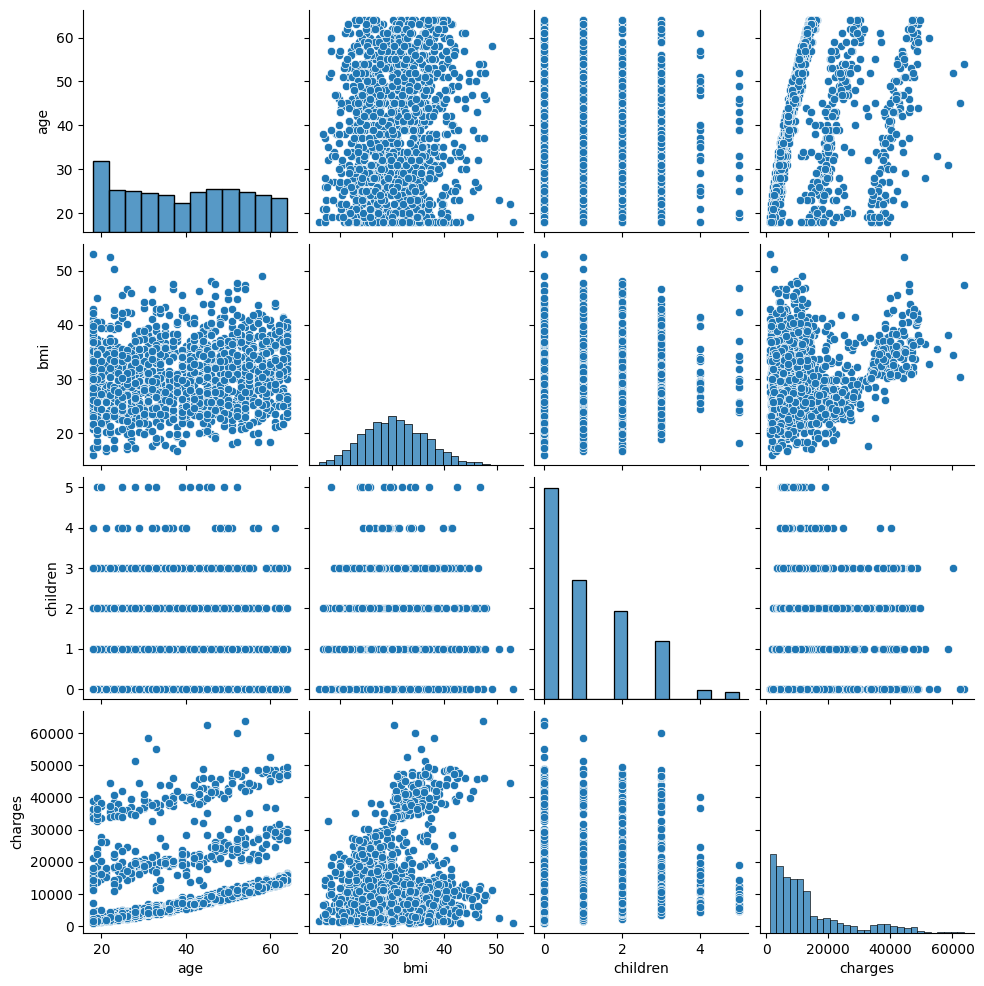

In [10]:
sns.pairplot(data=df);

## Variable respuesta

la variable respuesta en este caso será `charges`.

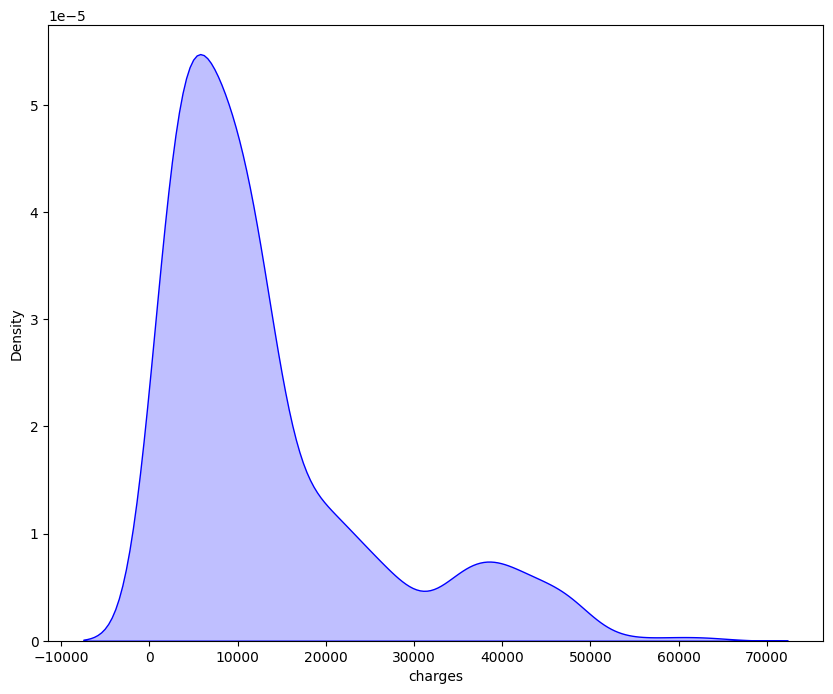

In [11]:
# vamos a ver visualmente como está distribuida la variable respuesta

##esto es un resumen un histograma

sns.kdeplot(
    df.charges, 
    color = "blue", 
    fill = True);

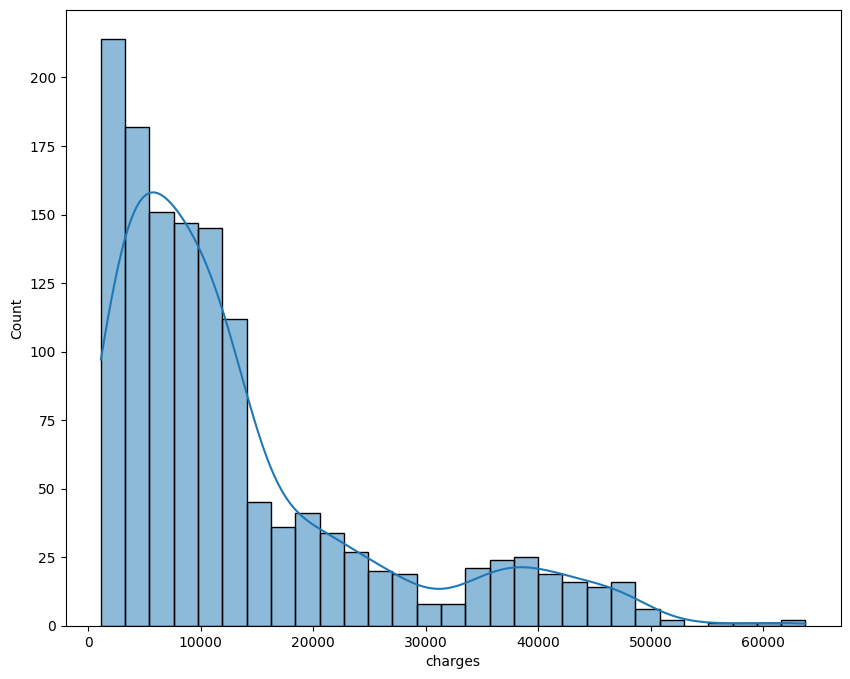

In [12]:
# cuantas casas tienen de media el valor que indica el eje x
sns.histplot(data = df, x = 'charges', kde = True);

La variable respuesta no es normal -- aunque tiene una forma normal, con cierto sesgo hacia la izquierda. Se puede comprobar de fomra matemática viendo si el p-valor > 0.05 -- en este caso vemos que es muy inferior.

In [13]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.814761221408844, pvalue=1.1960502558343857e-36)

## Variables predictoras
### variables numéricas

In [14]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df_numericas = df.select_dtypes(include = np.number)#.describe()
df_numericas.head(1)

,age,bmi,children,charges
0,19,27.9,0,16884.924


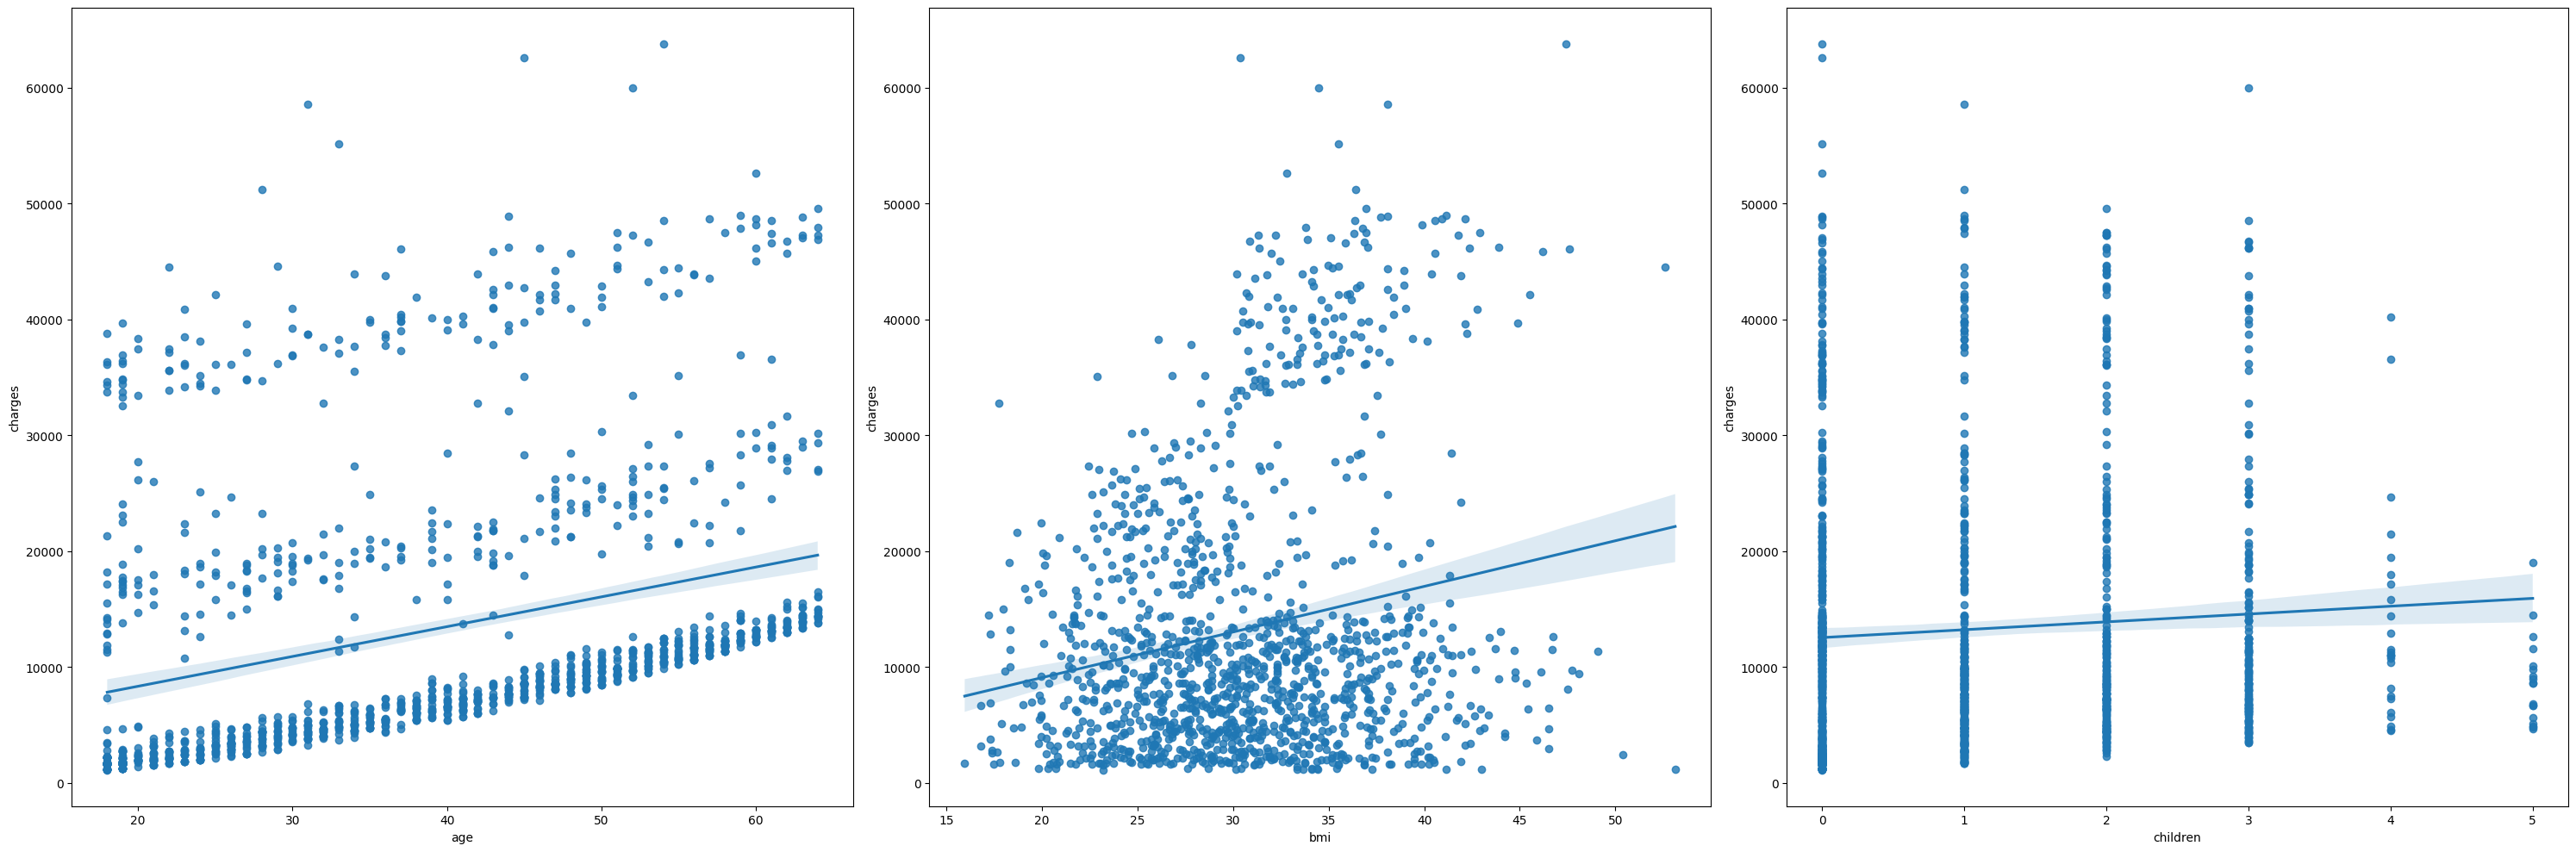

In [15]:
fig, axes = plt.subplots(ncols=3, figsize = (30,10))
axes = axes.flat
columnas = df_numericas.drop(['charges'], axis = 1)  
for i, columns in enumerate(columnas.columns):
    sns.regplot(data = df, x = columns, y = 'charges', ax = axes[i])
fig.tight_layout()

vale, confirmamos que la variable `children` es numérica, pero se puede considerar una variable categórica con 6 categorías.

la variable `bmi` se dispersa.

la variable `age` tiene una distribución más extraña -- parece que tiene tres partes que son lineales.

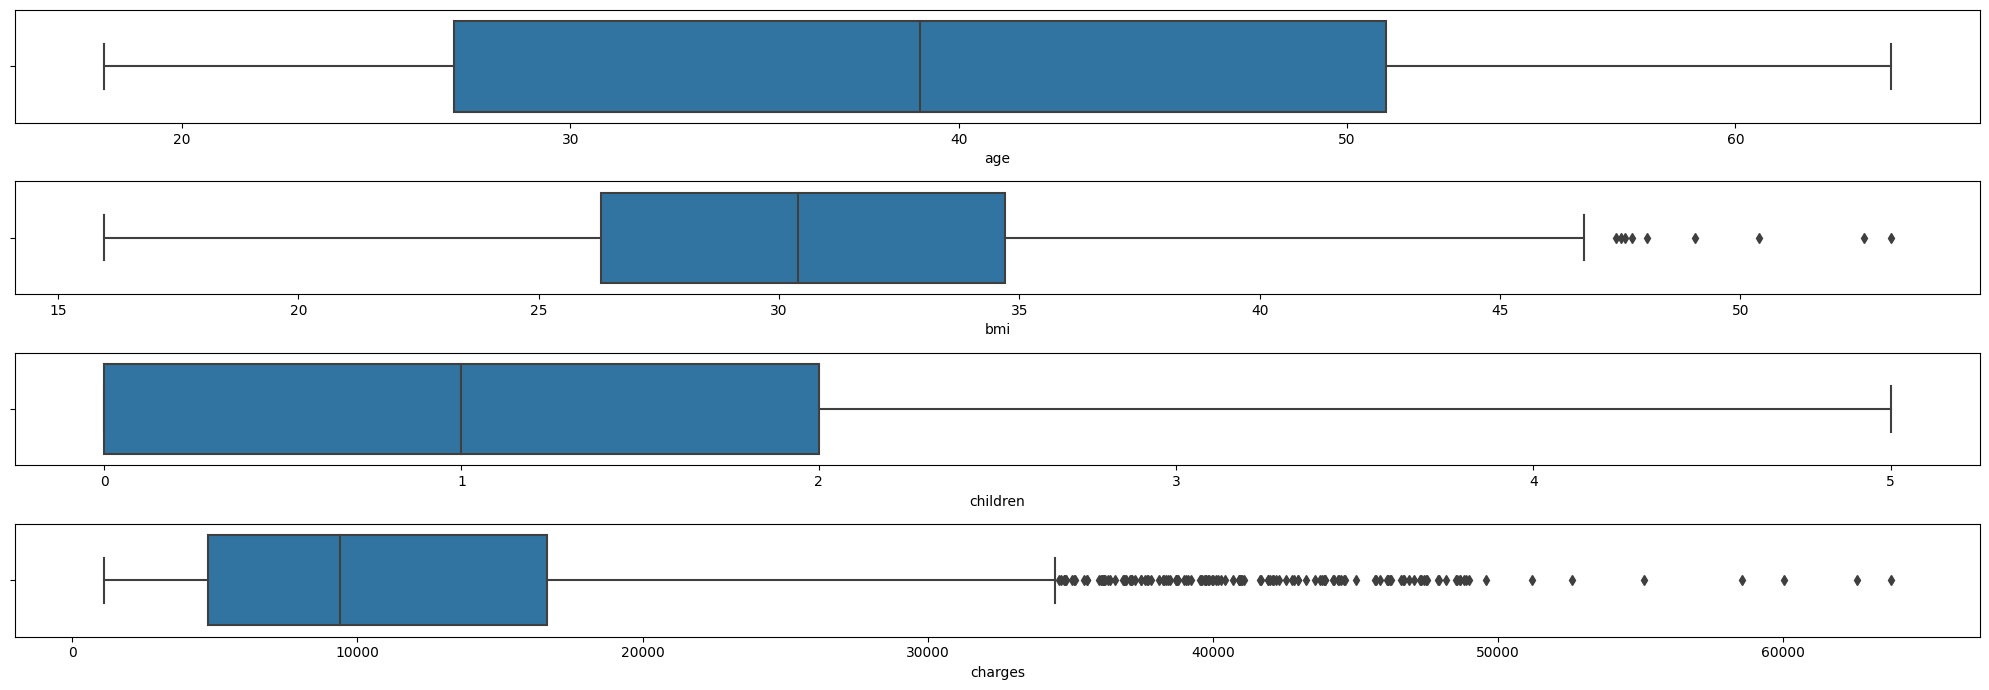

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(20,7))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

Mirando la mezcla de variables respuesta + variables predictoras, vemos que donde hay outliers es en el campo `bmi` de las variables predictoras y en la varable respuesta `charges`.

### Correlación entre variables numéricas

ojo: solo entre variables numéricas

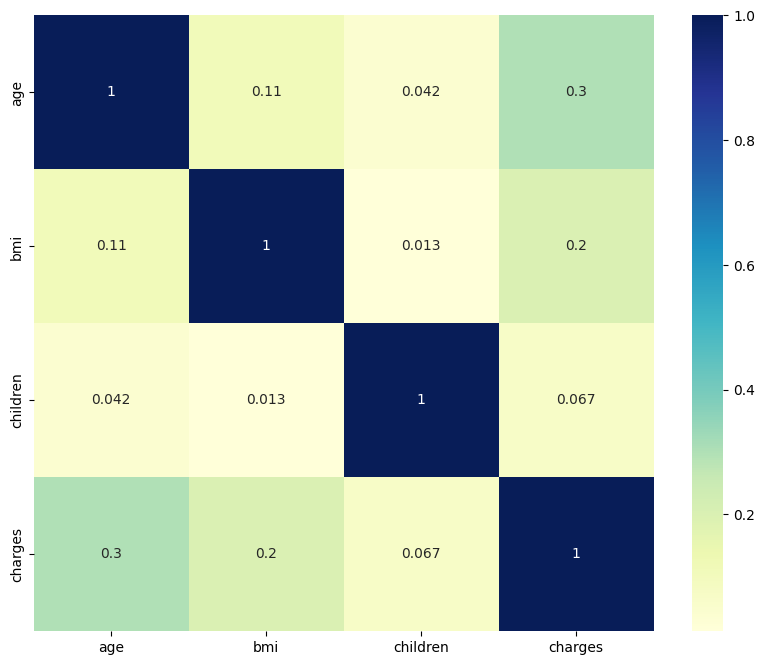

In [17]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

Mirando la matriz de correlación, la variable que más influye en la variable respuesta es `age`, seguida de `bmi` y `children`. 

### Variables categóricas

In [18]:
df_categoricas = df.select_dtypes(include='object')
df_categoricas.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


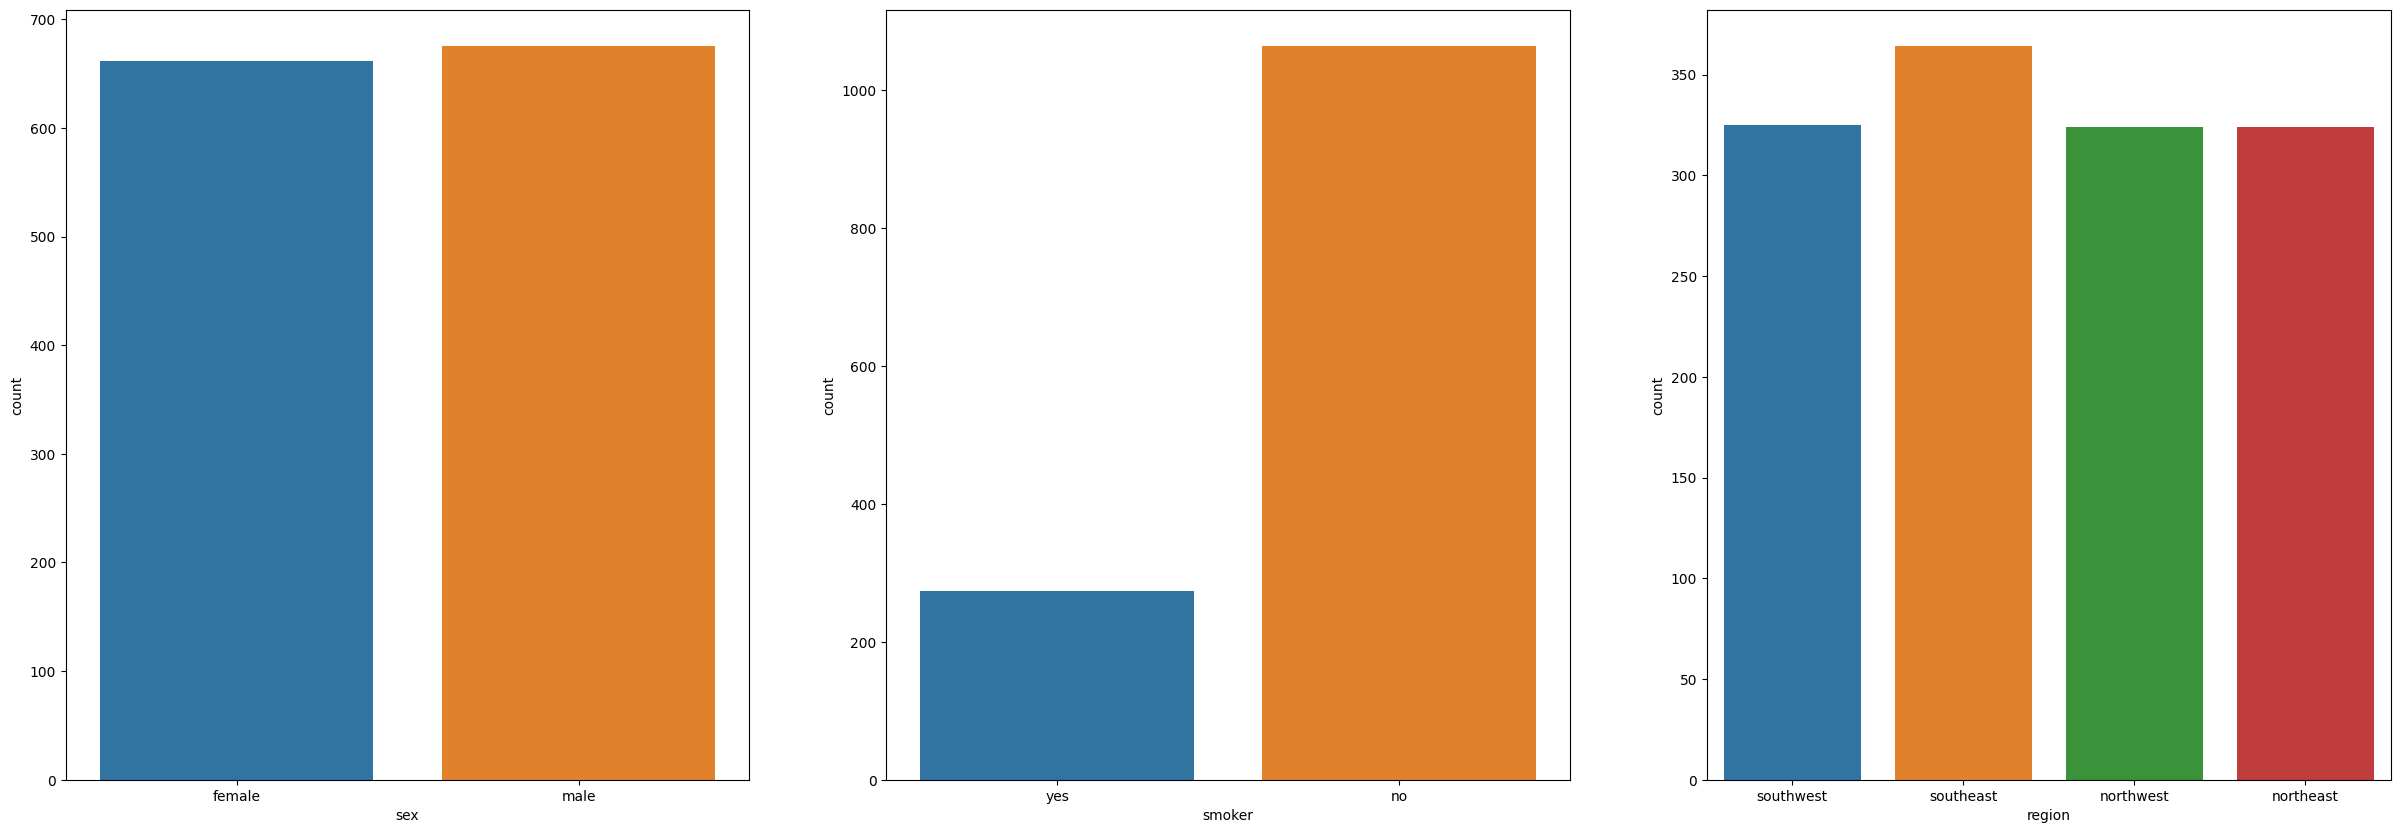

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

for i, columna in enumerate(df_categoricas.columns):
    sns.countplot(data = df, 
                  x = columna, 
                  ax = axes[i]);

Vemos que tanto `sex` como `region`. Lo que sí que vemos que hay una diferencia significativa es en la cantidad de fumadores. Veamos como se relacionan las variables con los valores de `charges`.
<br>vamos a sacar el precio medio por estados y ver como se distribuyen los precios:

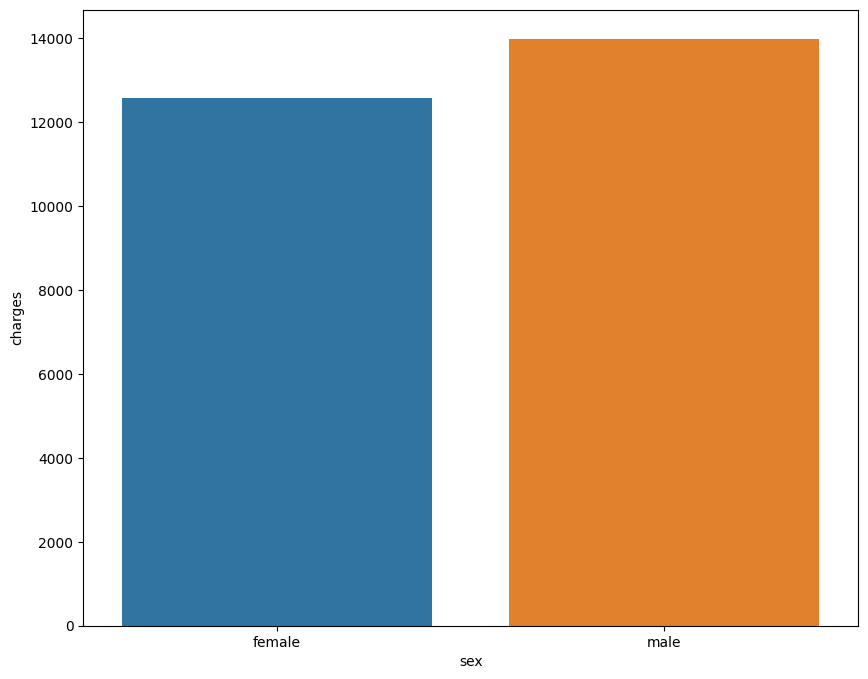

In [20]:
df_cate_sex = df.groupby('sex')['charges'].mean().reset_index()

sns.barplot(data=df_cate_sex, x = 'sex', y = 'charges');

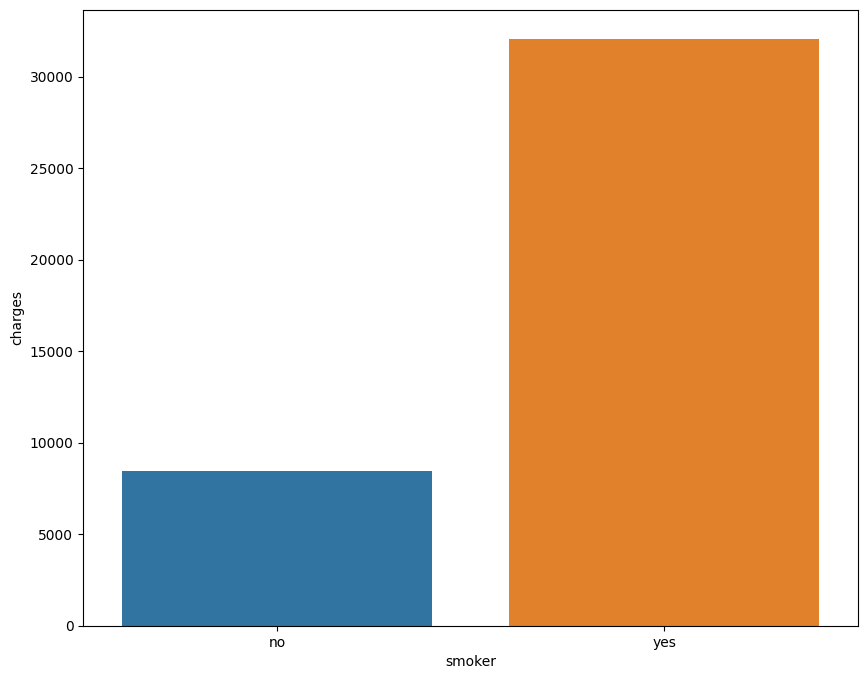

In [21]:
df_cate_smoker = df.groupby('smoker')['charges'].mean().reset_index()
sns.barplot(data=df_cate_smoker, x = 'smoker', y = 'charges');

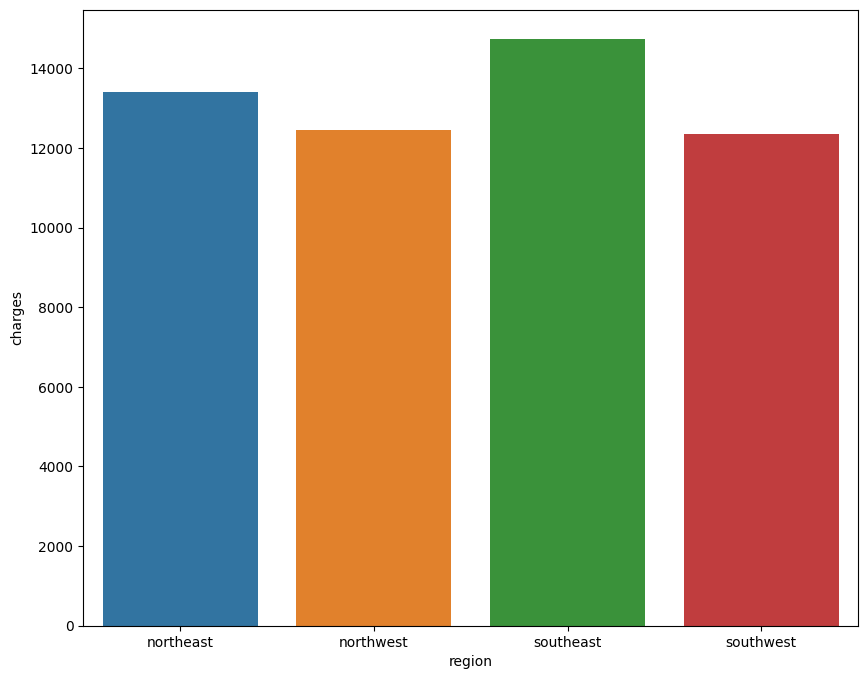

In [22]:
df_cate_smoker = df.groupby('region')['charges'].mean().reset_index()

sns.barplot(data=df_cate_smoker, x = 'region', y = 'charges');

Mirando el valor de la prima para las variables categóricas, la que más variabilidad tiene es `smokers`, ya que si la persona es fumadora tiene mucho más valor de `charges` que si no lo es.

## Gestión de nulos
Como hemos visto antes, no hay nulos en nuestro dataframe -- no hace falta sustituir los valores.

In [23]:
# Número de datos nulos por columna
# ==============================================================================
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## Gestión outliers

Lo que hemos visto en la observación de los datos, es que las columnas numéricas que más outliers tienen son `bmi` y la propia variable respuesta `charges`.

También es muy significativo como varía el valor de `charges` en función a la variable categórica `smokers`. Si las personas son fumadoras, parecen pagar más primas.

In [24]:
def detectar_outliers(lista_columnas, dataframe):

    dict_indices = {}

    for i in lista_columnas:
        Q1 = np.nanpercentile(dataframe[i], 25)
        Q3 = np.nanpercentile(dataframe[i], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5

        outliers_value = dataframe[(dataframe[i] < Q1 - outlier_step) | (dataframe[i] > Q3 + outlier_step)]

        if outliers_value.shape[0] > 0:
            dict_indices[i] = outliers_value.index.tolist()
        else:
            #dict_indices[i] = 'sin outliers'
            pass
    return dict_indices

### hipotesis 01: dividir charges mayores / menores de Q3
como el campo que tiene más outliers es `charges`, voy a probar a dividirlo entre los valores atípicos y los típicos.

In [52]:
Q1 = np.nanpercentile(df['charges'], 25)
Q3 = np.nanpercentile(df['charges'], 75)
IQR = Q3 - Q1
df_mayor_Q3 = df[(df['charges'] > Q3 + 1.5*IQR) | (df['charges'] < Q1 - 1.5*IQR)]
df_menor_Q3 = df[(df['charges'] <= Q3 + 1.5*IQR) & (df['charges'] >= Q1 - 1.5*IQR)]

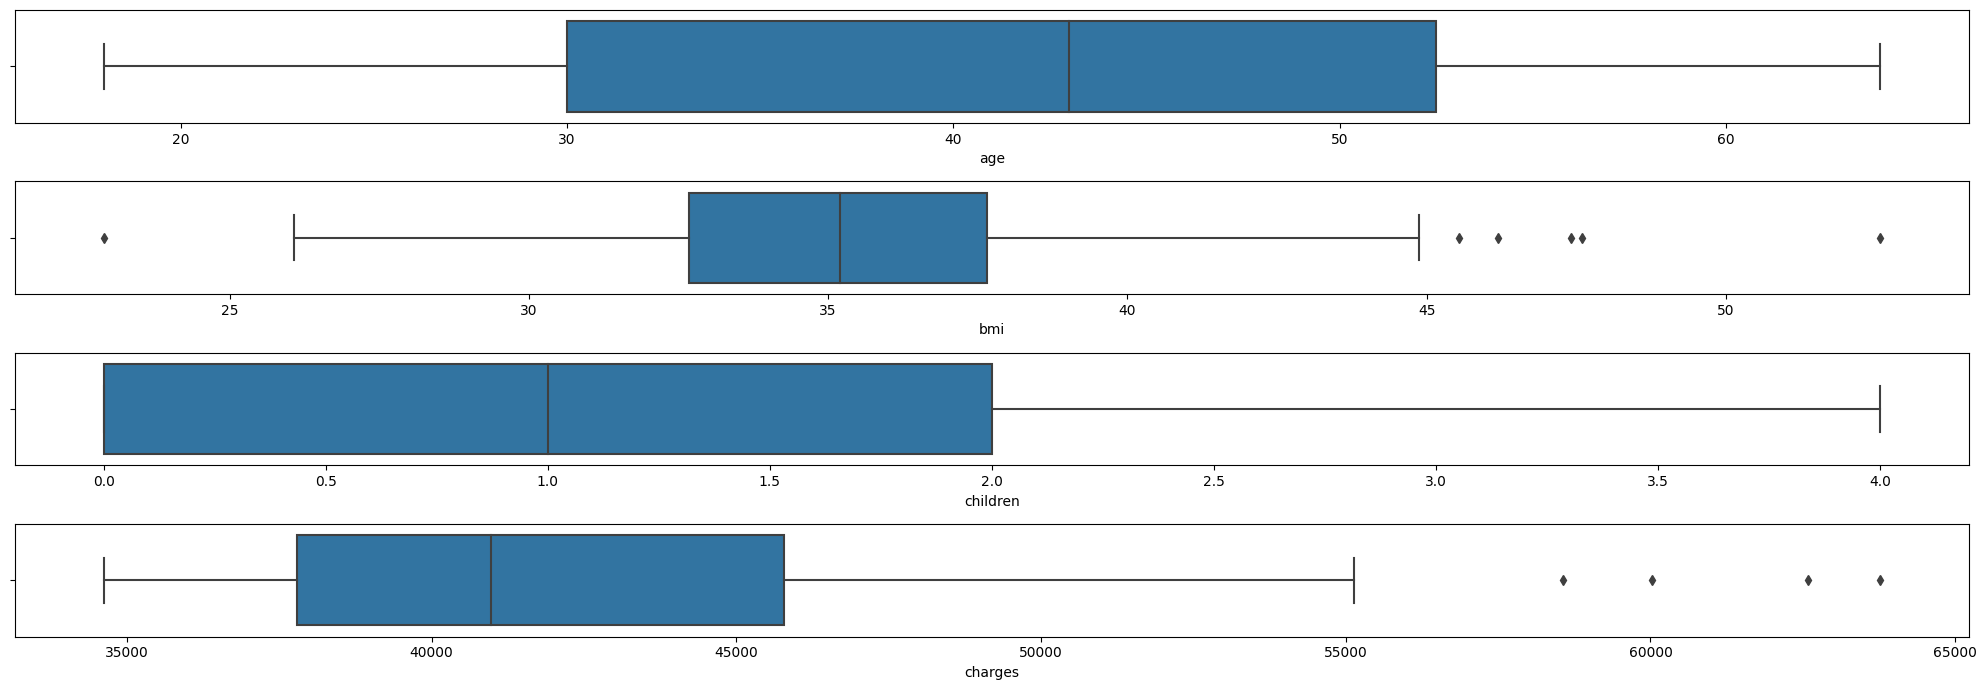

In [53]:
df_mayor_Q3_numericas = df_mayor_Q3.select_dtypes(include=np.number)

fig, ax = plt.subplots(4, 1, figsize=(20,7))

for i in range(len(df_mayor_Q3_numericas.columns)):
    sns.boxplot(x=df_mayor_Q3_numericas.columns[i], data=df_mayor_Q3_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

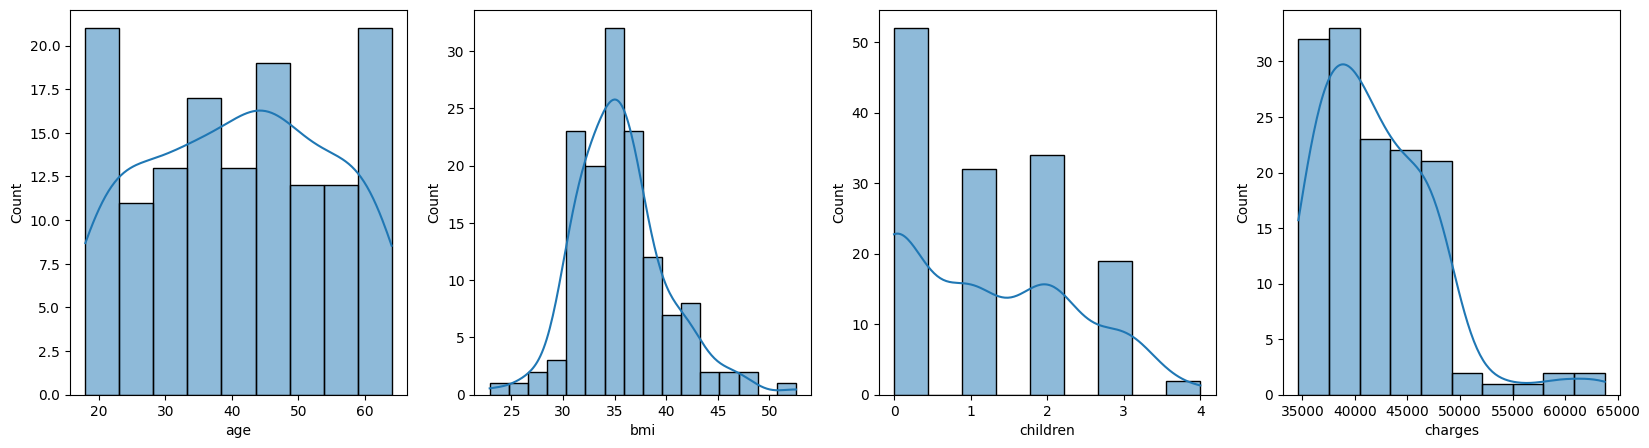

In [54]:
fig, ax = plt.subplots(1,4, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(df_mayor_Q3_numericas.columns):
    sns.histplot(data = df_mayor_Q3_numericas, x = columna, kde = True, ax = ax[i])
    
#fig.delaxes(ax[-1])
plt.show()

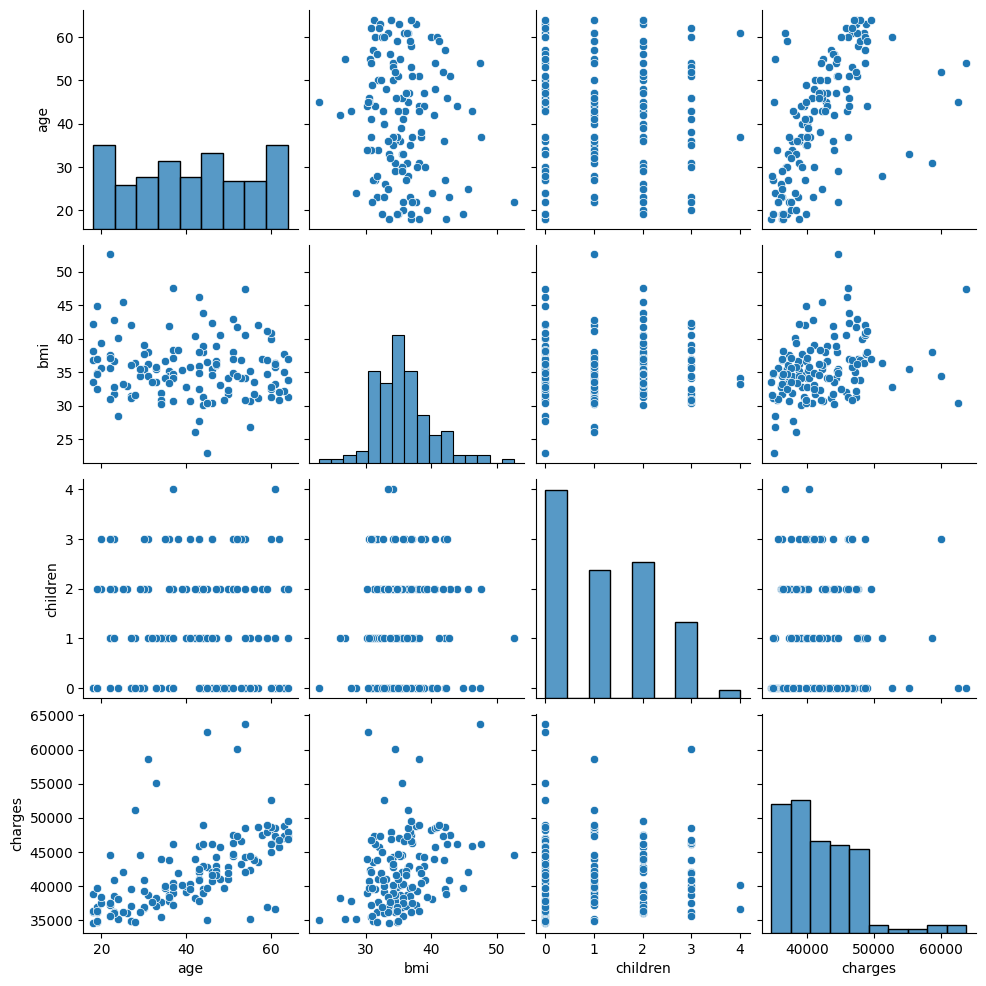

In [55]:
sns.pairplot(df_mayor_Q3);

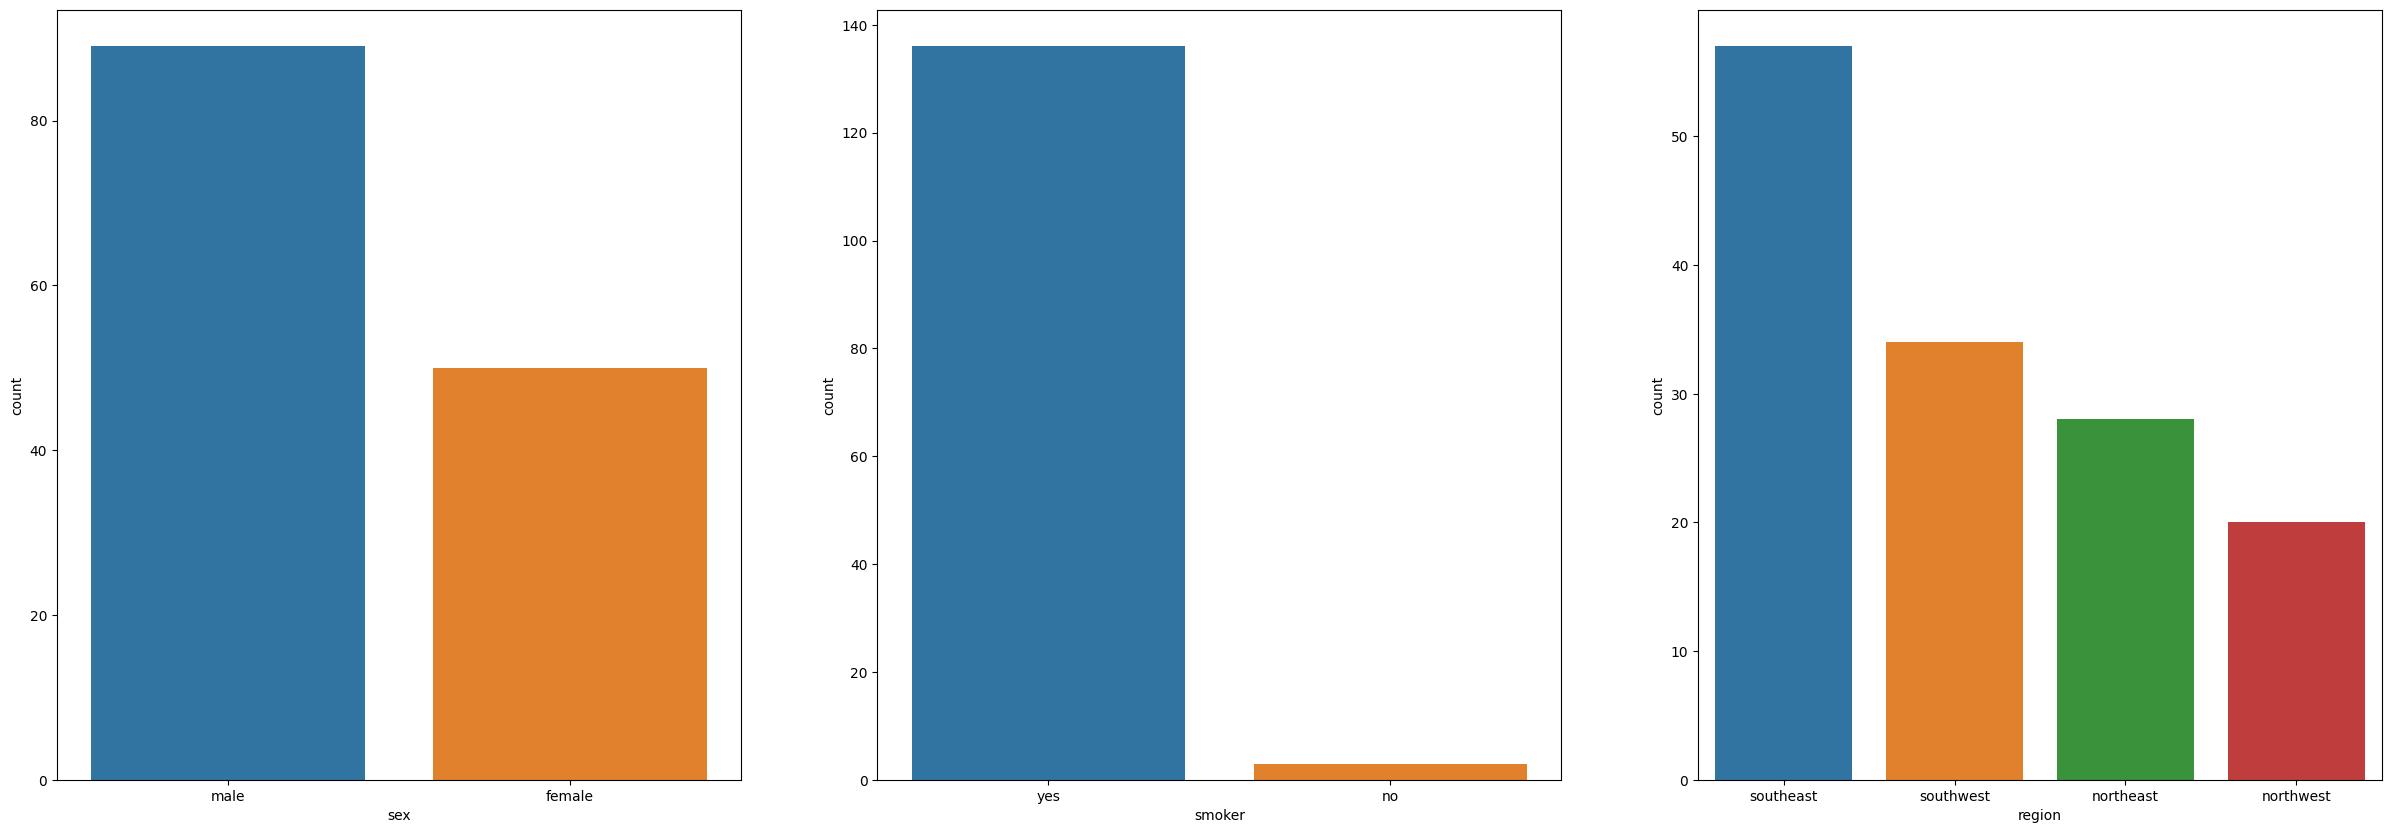

In [56]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

for i, columna in enumerate(df_categoricas.columns):
    sns.countplot(data = df_mayor_Q3, 
                  x = columna, 
                  ax = axes[i]);

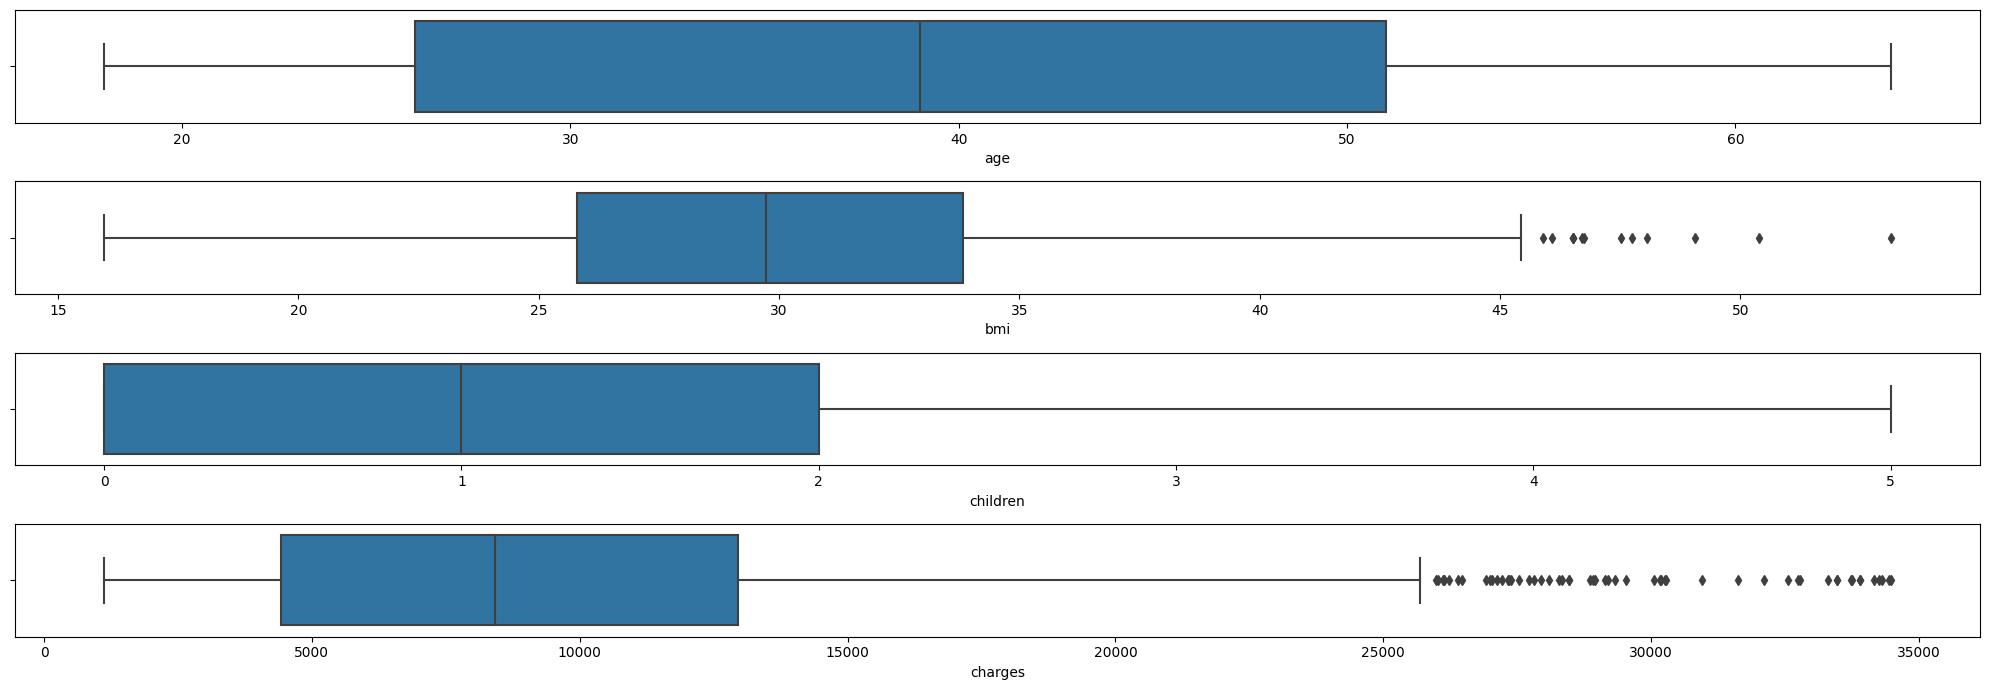

In [57]:
df_menor_Q3_numericas = df_menor_Q3.select_dtypes(include=np.number)

fig, ax = plt.subplots(4, 1, figsize=(20,7))

for i in range(len(df_menor_Q3_numericas.columns)):
    sns.boxplot(x=df_menor_Q3_numericas.columns[i], data=df_menor_Q3_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

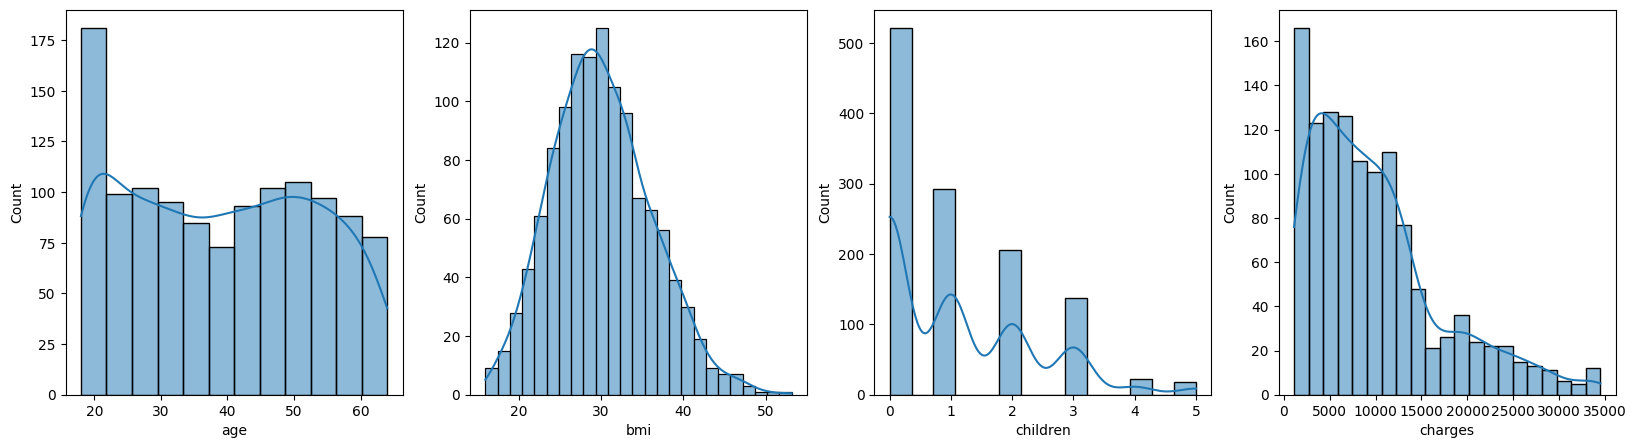

In [58]:
fig, ax = plt.subplots(1,4, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(df_menor_Q3_numericas.columns):
    sns.histplot(data = df_menor_Q3_numericas, x = columna, kde = True, ax = ax[i])
    
#fig.delaxes(ax[-1])
plt.show()

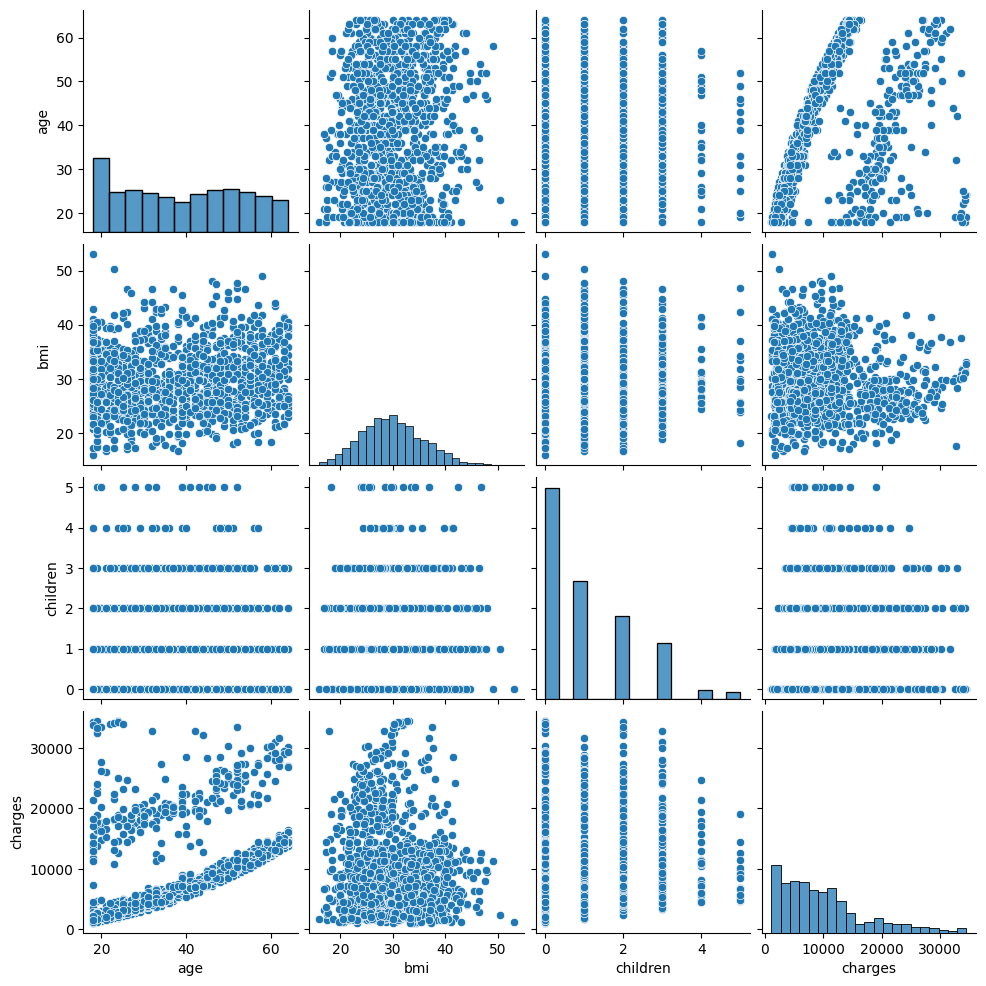

In [59]:
sns.pairplot(df_menor_Q3);

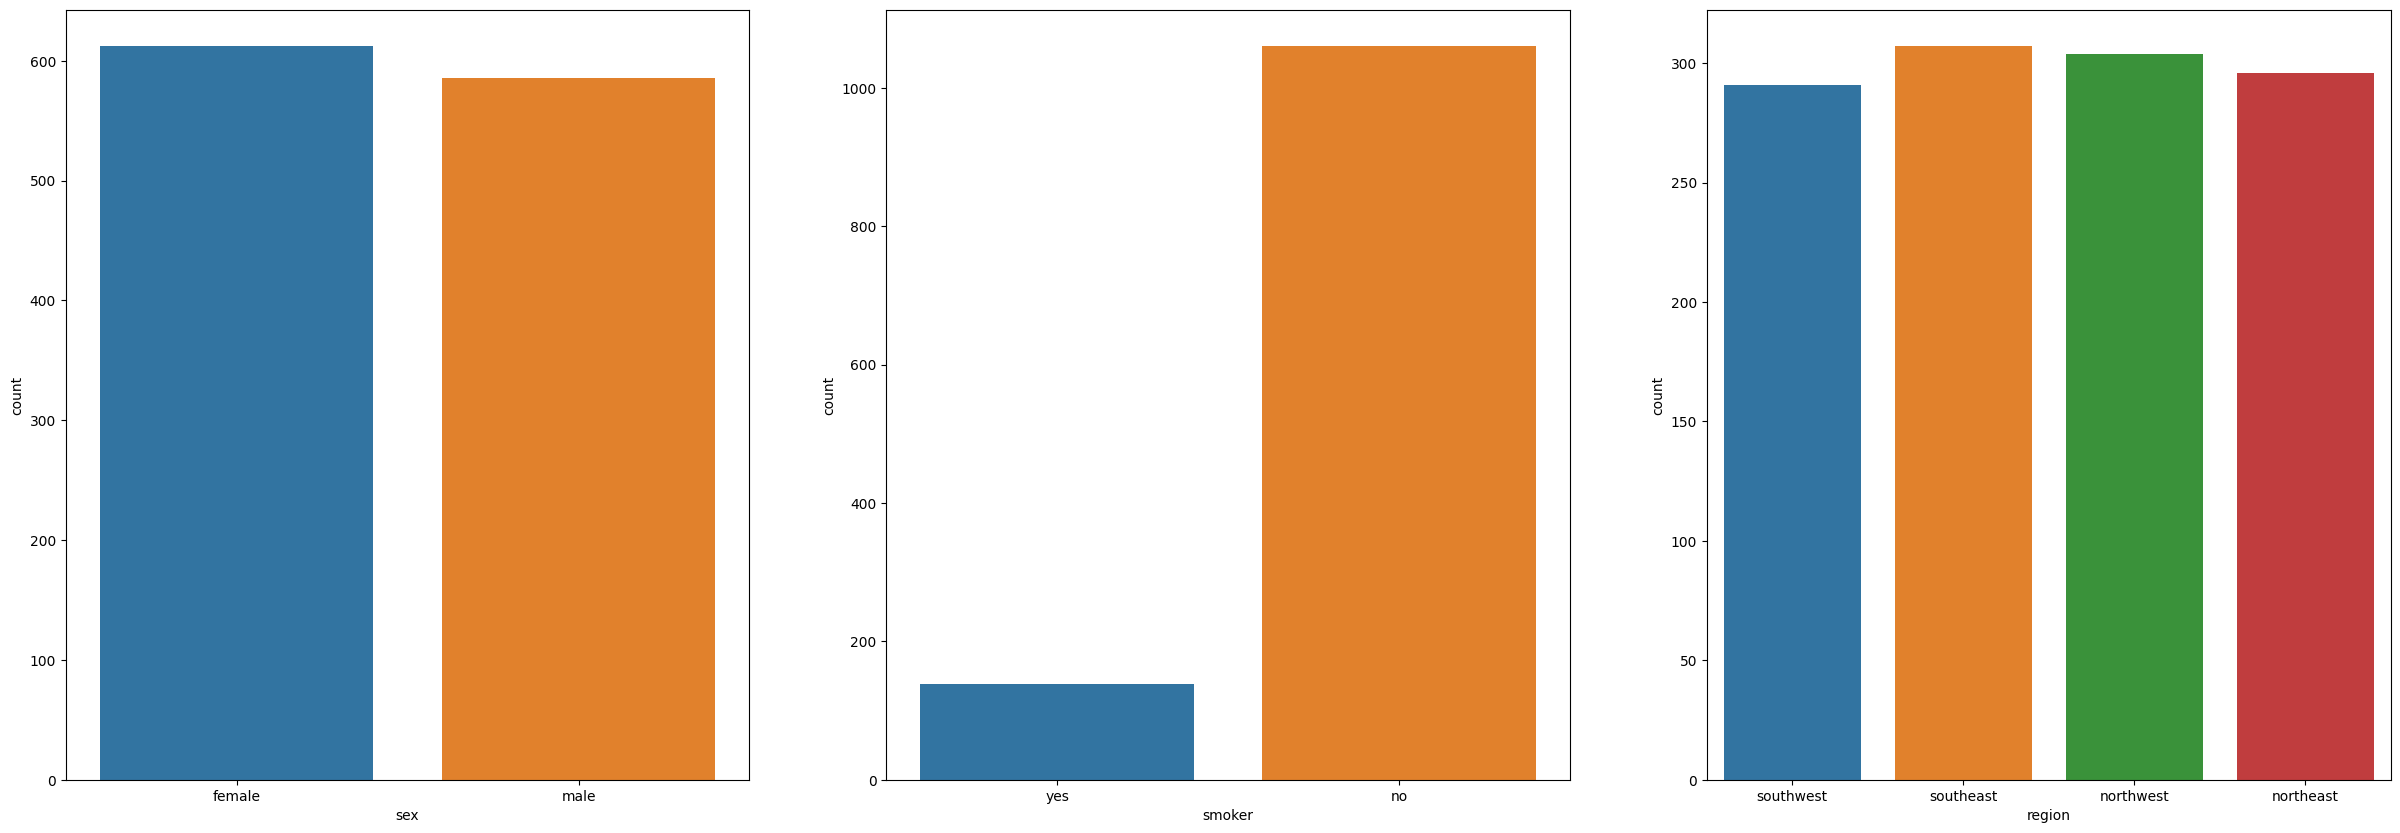

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

for i, columna in enumerate(df_categoricas.columns):
    sns.countplot(data = df_menor_Q3, 
                  x = columna, 
                  ax = axes[i]);

vemos que aún así sigue habiendo valores atípicos en los datos de `charges`, de forma que no parece que se normalice la distribución. Voy a probar a separar este subconjunto con los valores de `smokers`.

### hipotesis 01.2: separo entre tipos de smokers

In [67]:
df_smoker = df_menor_Q3[df_menor_Q3['smoker'] == 'yes']
df_non_smoker = df_menor_Q3[df_menor_Q3['smoker'] == 'no']
print(df_smoker.shape, df_non_smoker.shape)

(138, 7) (1060, 7)


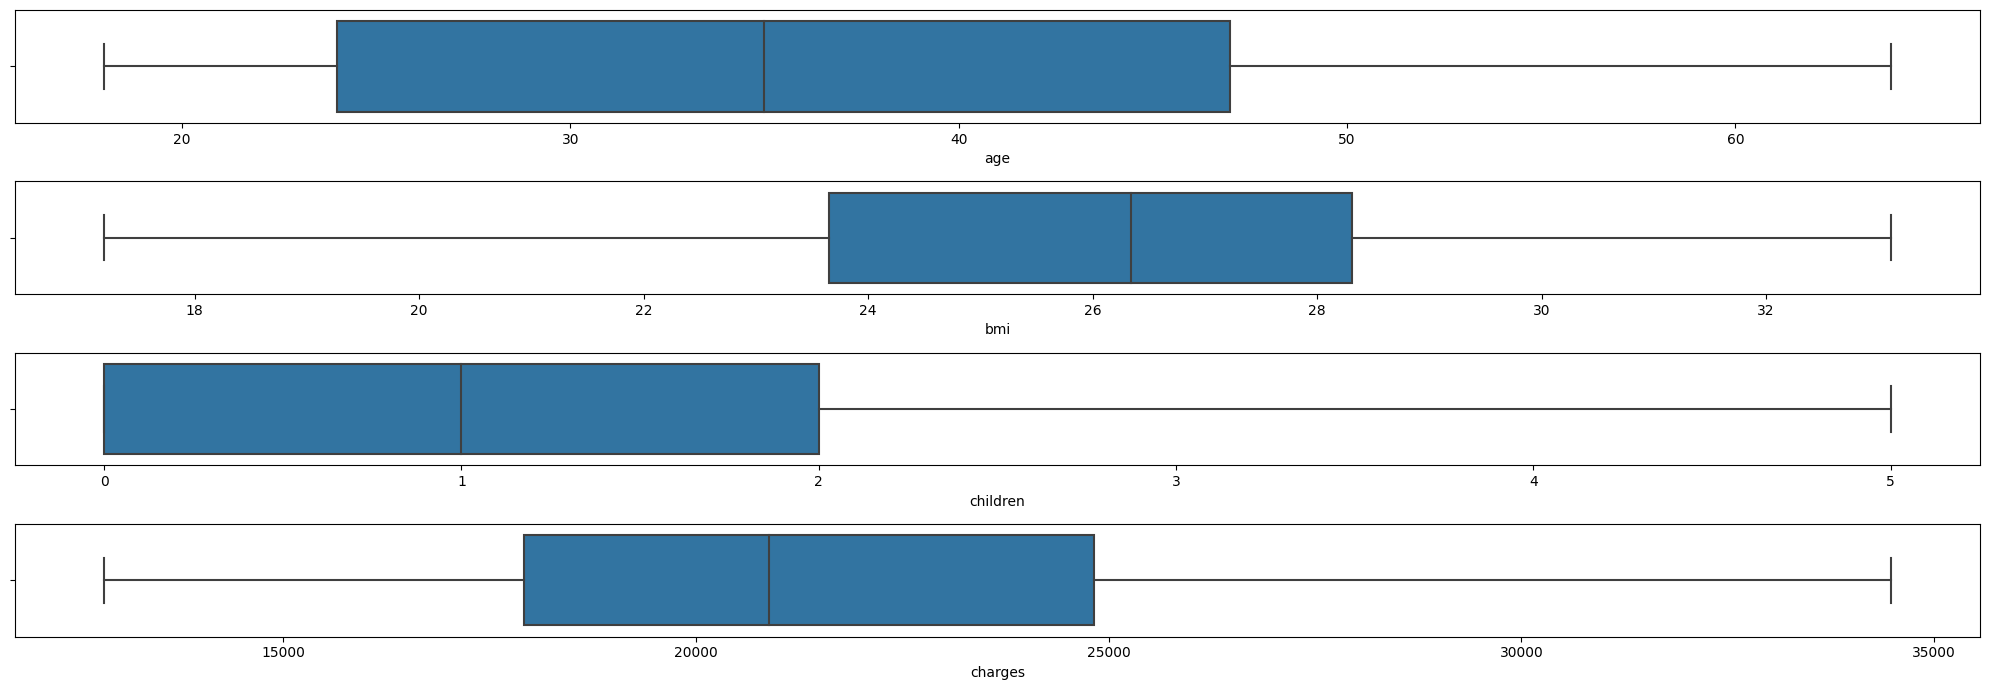

In [69]:
df_smoker_numericas = df_smoker.select_dtypes(include=np.number)

fig, ax = plt.subplots(4, 1, figsize=(20,7))

for i in range(len(df_smoker_numericas.columns)):
    sns.boxplot(x=df_smoker_numericas.columns[i], data=df_smoker_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

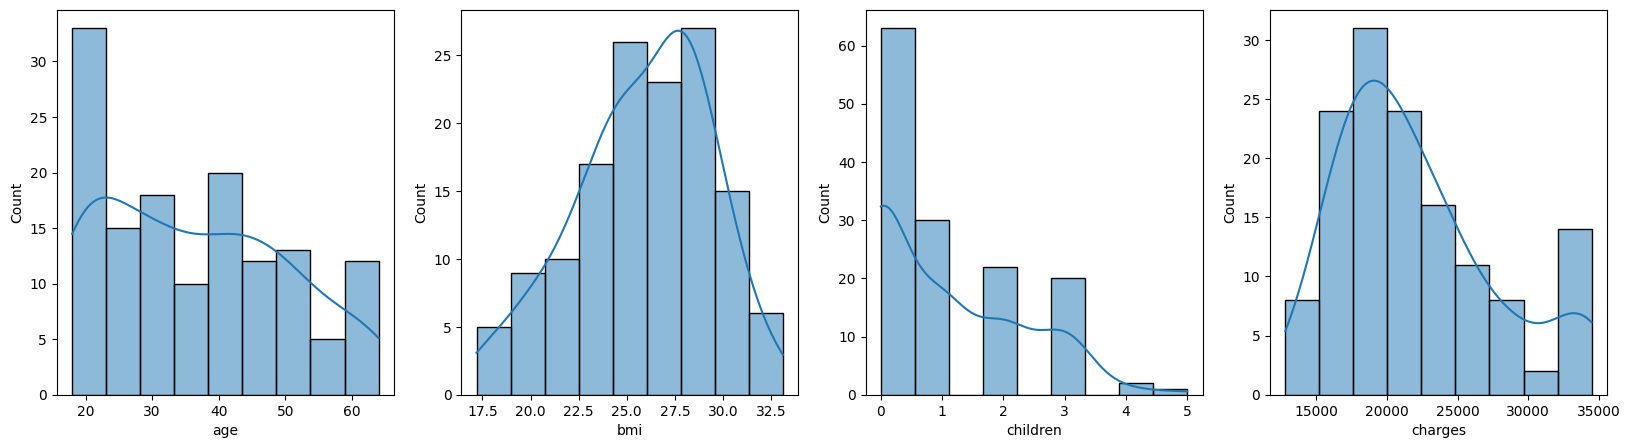

In [70]:
fig, ax = plt.subplots(1,4, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(df_smoker_numericas.columns):
    sns.histplot(data = df_smoker_numericas, x = columna, kde = True, ax = ax[i])
    
#fig.delaxes(ax[-1])
plt.show()

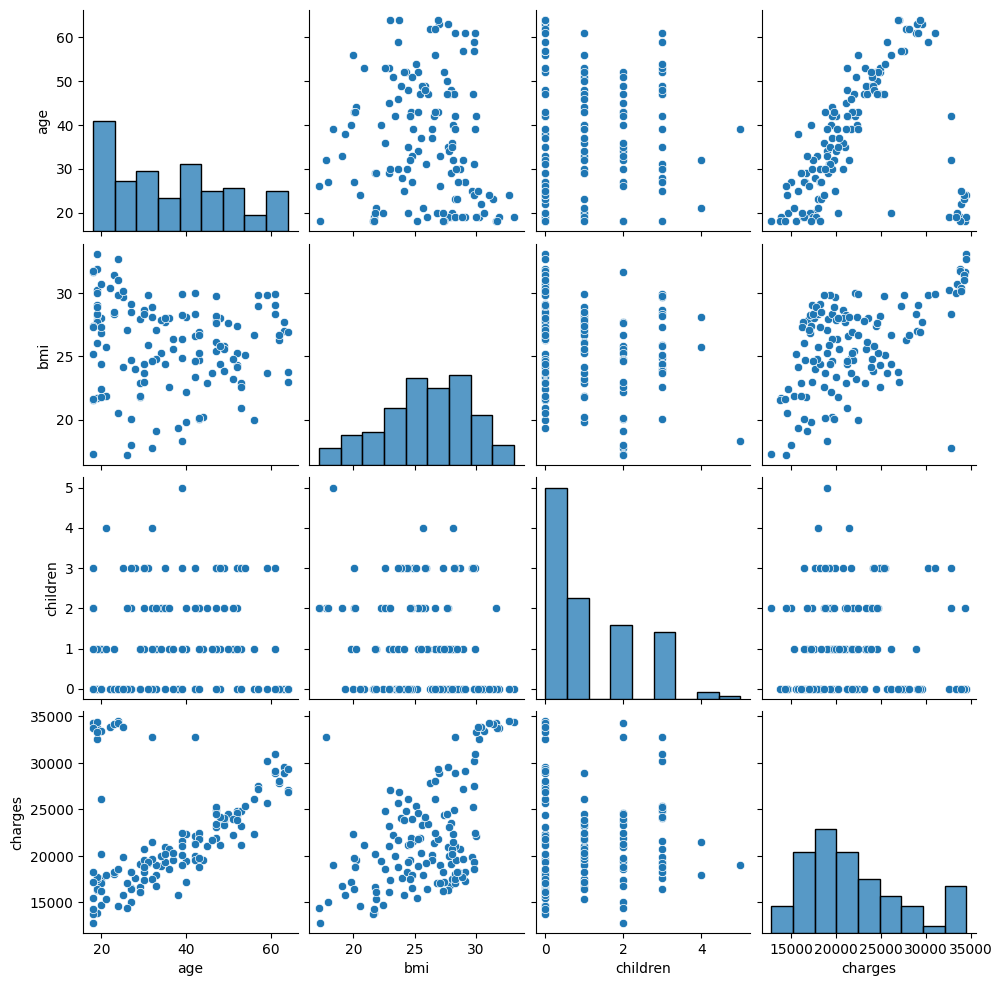

In [68]:
sns.pairplot(df_smoker);

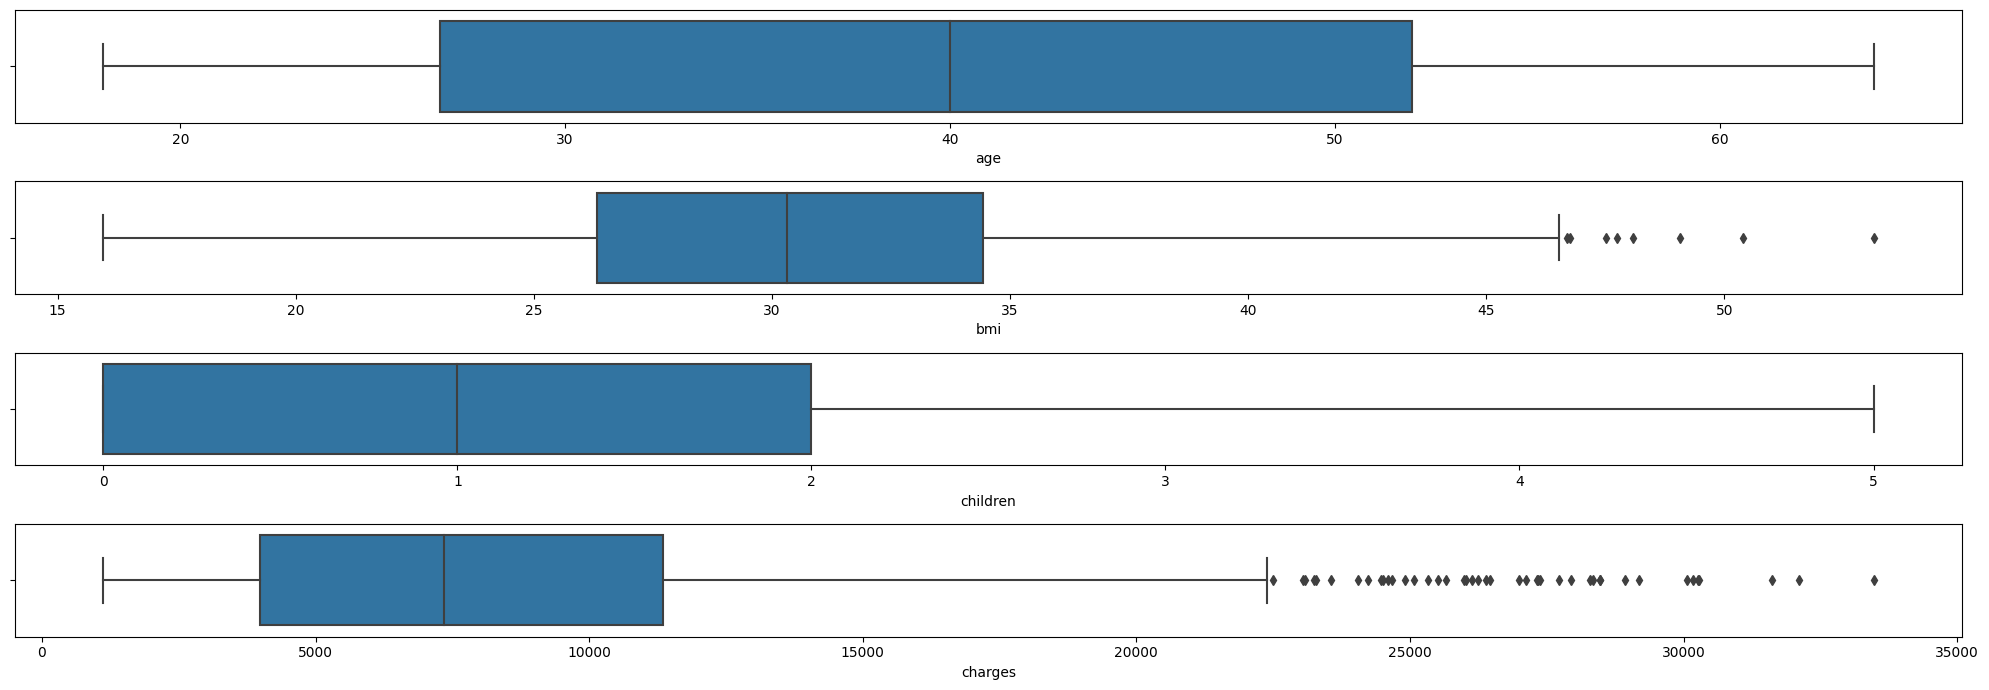

In [71]:
df_non_smoker_numericas = df_non_smoker.select_dtypes(include=np.number)

fig, ax = plt.subplots(4, 1, figsize=(20,7))

for i in range(len(df_non_smoker_numericas.columns)):
    sns.boxplot(x=df_non_smoker_numericas.columns[i], data=df_non_smoker_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

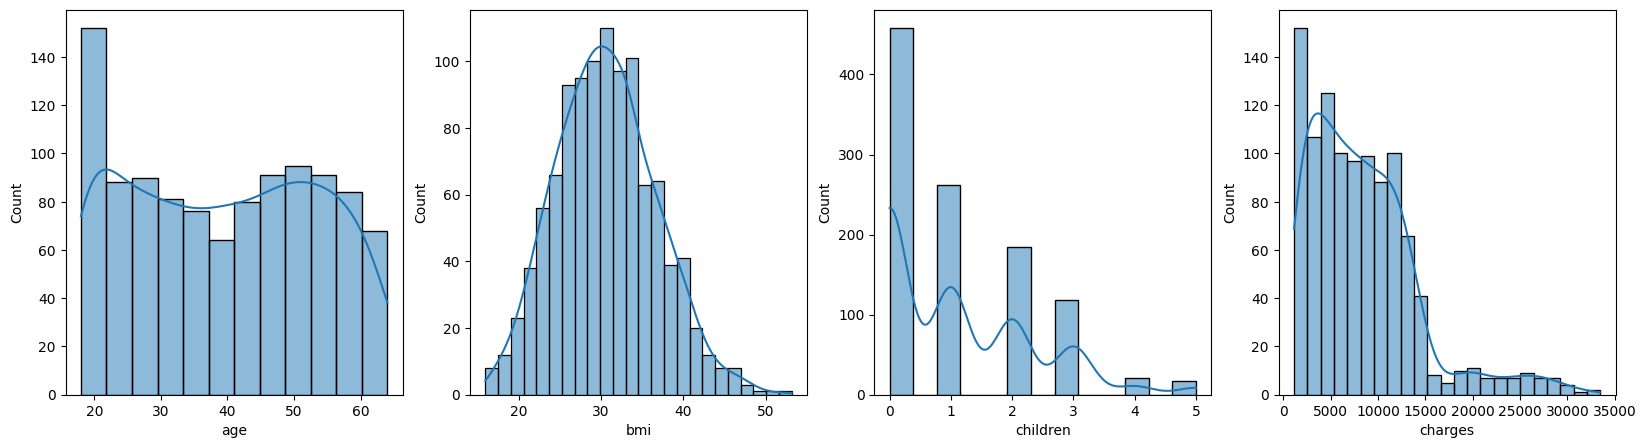

In [72]:
fig, ax = plt.subplots(1,4, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(df_non_smoker_numericas.columns):
    sns.histplot(data = df_non_smoker_numericas, x = columna, kde = True, ax = ax[i])
    
#fig.delaxes(ax[-1])
plt.show()

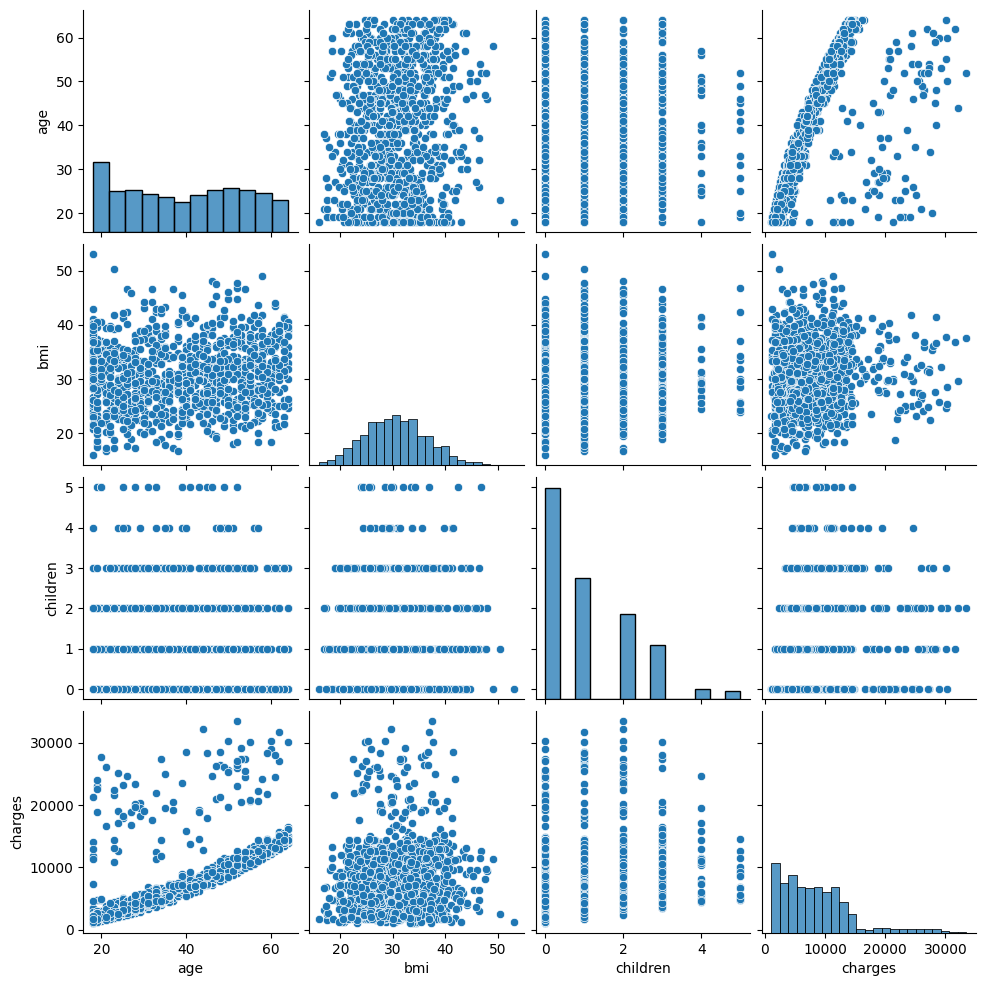

In [65]:
sns.pairplot(df_non_smoker);

In [75]:
print(stats.shapiro(df_mayor_Q3["charges"]), 
      stats.shapiro(df_non_smoker['charges']), 
      stats.shapiro(df_smoker['charges']))

ShapiroResult(statistic=0.9084067940711975, pvalue=1.0183718046619106e-07) ShapiroResult(statistic=0.8832111954689026, pvalue=1.644357638366861e-27) ShapiroResult(statistic=0.9242526888847351, pvalue=1.0104752163897501e-06)


# normalización

In [76]:
print(df_mayor_Q3.shape, df_smoker.shape, df_non_smoker.shape)

(139, 7) (138, 7) (1060, 7)


habiendo separado en tres los dataframes (`df_smoker`, `df_charges`, `df_charges_out`), parece que se obtiene mejores valores de p-valor. sin embargo, al ser todos menores de 0.05, habrá que normalizar igualmente.

## logarítmica

In [77]:
df_mayor_Q3['charges_LOG'] = df_mayor_Q3['charges'].apply(lambda x: np.log(x) if x != 0 else 0)
df_smoker['charges_LOG'] = df_smoker['charges'].apply(lambda x: np.log(x) if x != 0 else 0)
df_non_smoker['charges_LOG'] = df_non_smoker['charges'].apply(lambda x: np.log(x) if x != 0 else 0)

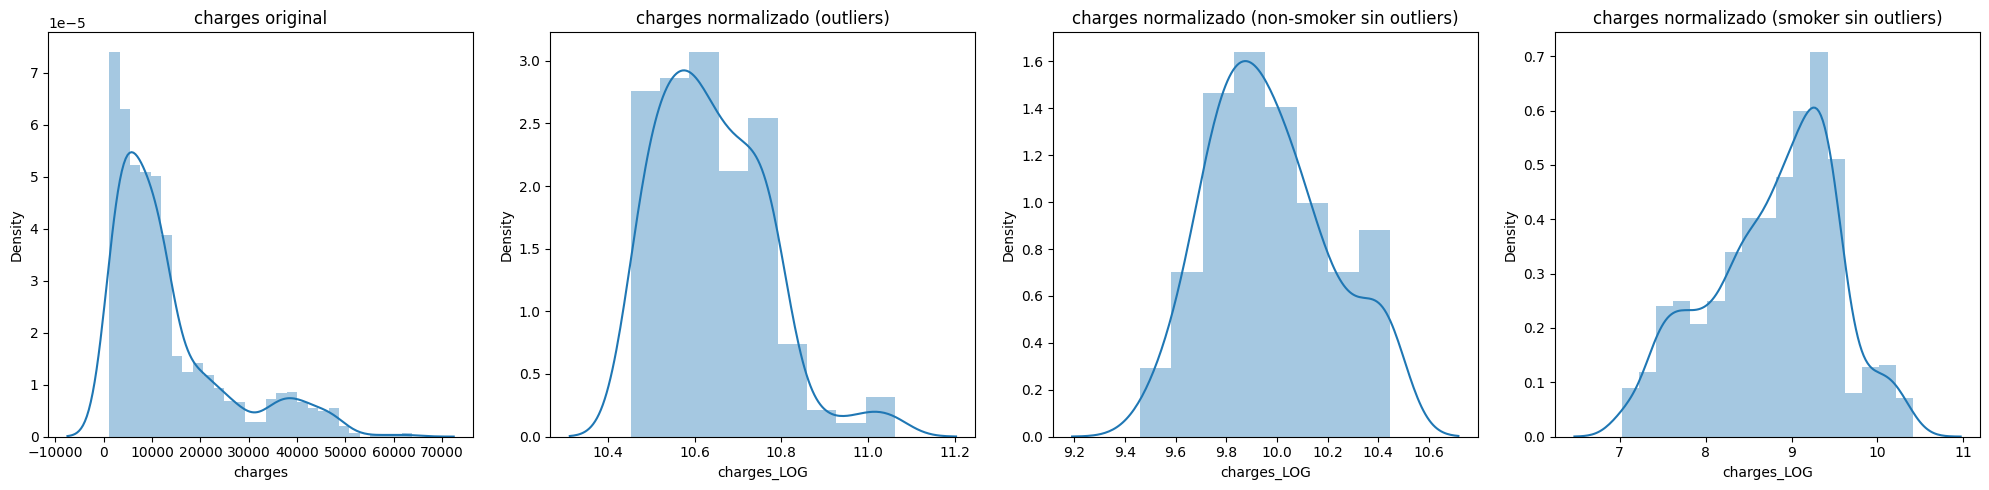

In [80]:
fig, axes = plt.subplots(1, 4, figsize = (20,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado (outliers)')
axes[2].set_title('charges normalizado (non-smoker sin outliers)')
axes[3].set_title('charges normalizado (smoker sin outliers)')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df_mayor_Q3['charges_LOG'], ax = axes[1])
sns.distplot(df_smoker['charges_LOG'], ax = axes[2])
sns.distplot(df_non_smoker['charges_LOG'], ax = axes[3])
fig.tight_layout();

In [81]:
print('original mayor Q3', stats.shapiro(df_mayor_Q3["charges"]), '\n mayor Q3 log:', stats.shapiro(df_mayor_Q3["charges_LOG"]), 
      '\n original menor Q3', stats.shapiro(df_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_smoker["charges_LOG"]),
      '\n original menor Q3', stats.shapiro(df_non_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_non_smoker["charges_LOG"]),
)

original mayor Q3 ShapiroResult(statistic=0.9084067940711975, pvalue=1.0183718046619106e-07) 
 mayor Q3 log: ShapiroResult(statistic=0.947198212146759, pvalue=3.871522130793892e-05) 
 original menor Q3 ShapiroResult(statistic=0.9242526888847351, pvalue=1.0104752163897501e-06) 
 menor Q3 log: ShapiroResult(statistic=0.9683992862701416, pvalue=0.0027341179084032774) 
 original menor Q3 ShapiroResult(statistic=0.8832111954689026, pvalue=1.644357638366861e-27) 
 menor Q3 log: ShapiroResult(statistic=0.9745790362358093, pvalue=1.1156702731801582e-12)


no se ha acabado de normalizar, pero si que ha corregido un poco la forma desviada a la izquierda y el pvalor crece (aunque sea inferior a 0.05). Vamos a probar otro método.

## raíz cuadrada

In [82]:
df_mayor_Q3['charges_SQRT'] = df_mayor_Q3['charges'].apply(lambda x: math.sqrt(x) if x != 0 else 0)
df_smoker['charges_SQRT'] = df_smoker['charges'].apply(lambda x: math.sqrt(x) if x != 0 else 0)
df_non_smoker['charges_SQRT'] = df_non_smoker['charges'].apply(lambda x: math.sqrt(x) if x != 0 else 0)

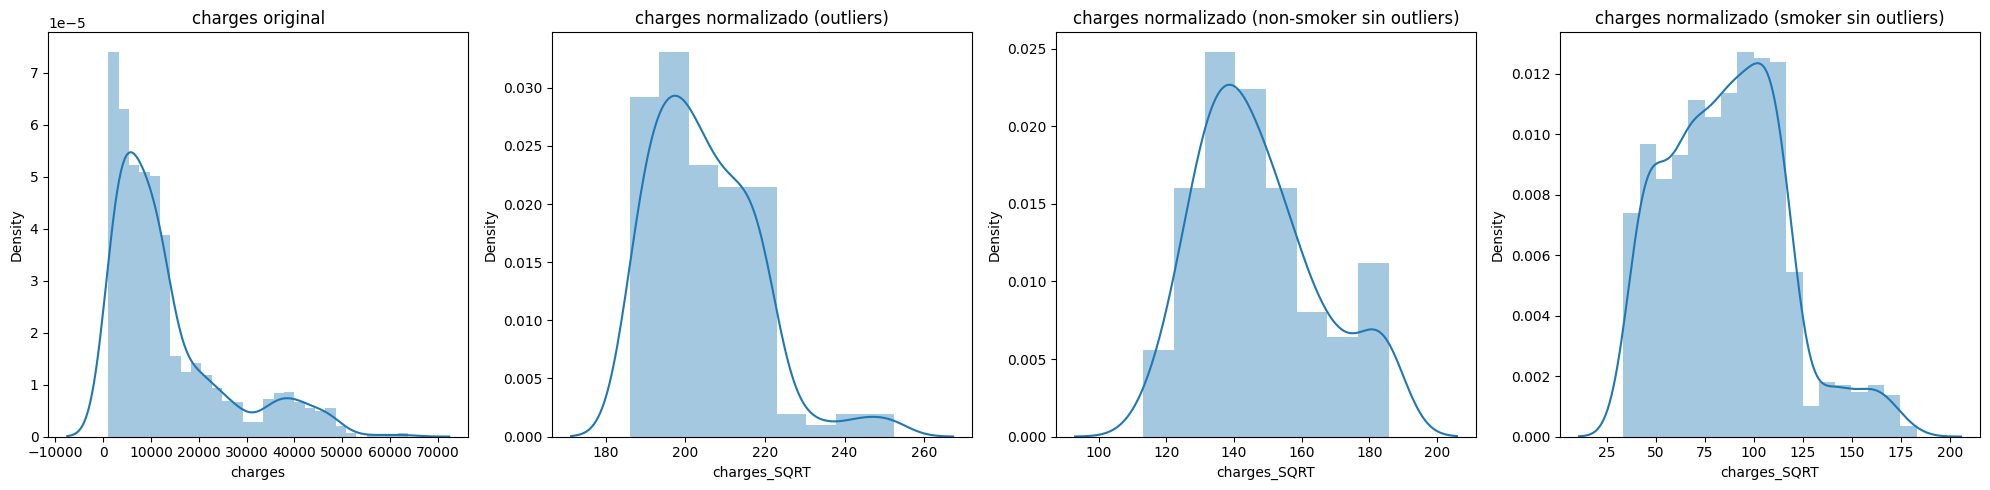

In [84]:
fig, axes = plt.subplots(1, 4, figsize = (20,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado (outliers)')
axes[2].set_title('charges normalizado (non-smoker sin outliers)')
axes[3].set_title('charges normalizado (smoker sin outliers)')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df_mayor_Q3['charges_SQRT'], ax = axes[1])
sns.distplot(df_smoker['charges_SQRT'], ax = axes[2])
sns.distplot(df_non_smoker['charges_SQRT'], ax = axes[3])
fig.tight_layout();

In [85]:
print('original mayor Q3', stats.shapiro(df_mayor_Q3["charges"]), '\n mayor Q3 log:', stats.shapiro(df_mayor_Q3["charges_LOG"]), 
      '\n original menor Q3', stats.shapiro(df_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_smoker["charges_LOG"]),
      '\n original menor Q3', stats.shapiro(df_non_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_non_smoker["charges_LOG"]),
)

original mayor Q3 ShapiroResult(statistic=0.9084067940711975, pvalue=1.0183718046619106e-07) 
 mayor Q3 log: ShapiroResult(statistic=0.947198212146759, pvalue=3.871522130793892e-05) 
 original menor Q3 ShapiroResult(statistic=0.9242526888847351, pvalue=1.0104752163897501e-06) 
 menor Q3 log: ShapiroResult(statistic=0.9683992862701416, pvalue=0.0027341179084032774) 
 original menor Q3 ShapiroResult(statistic=0.8832111954689026, pvalue=1.644357638366861e-27) 
 menor Q3 log: ShapiroResult(statistic=0.9745790362358093, pvalue=1.1156702731801582e-12)


comparando la transformación logarítmica frente a la raíz cuadrada, la logarítmica obtiene un mejor valor de P-valor (aunque sigue sin ser suficiente). Probaremos ahora con la transformación boxcox.

## boxcox

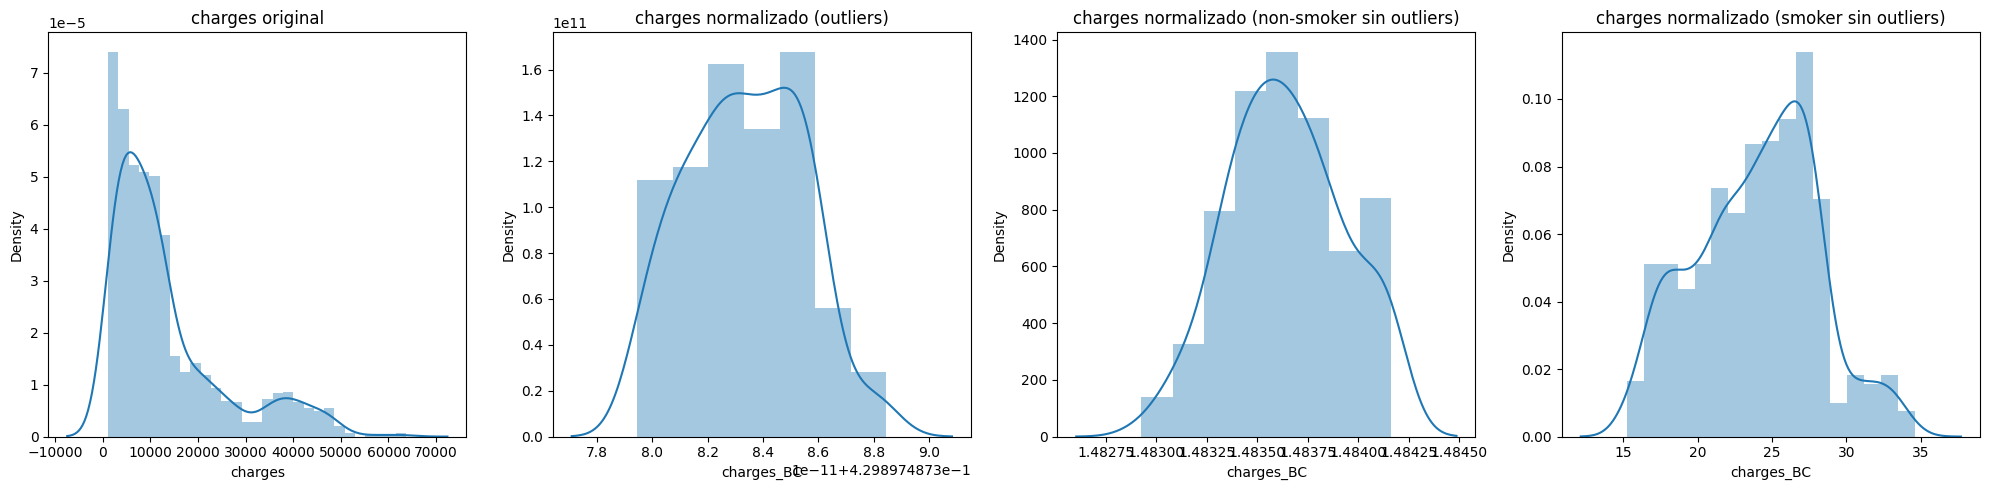

In [86]:
df_mayor_Q3['charges_BC'], lambda_ajustada = stats.boxcox(df_mayor_Q3['charges'])
df_smoker['charges_BC'], lambda_ajustada = stats.boxcox(df_smoker['charges'])
df_non_smoker['charges_BC'], lambda_ajustada = stats.boxcox(df_non_smoker['charges'])

fig, axes = plt.subplots(1, 4, figsize = (20,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado (outliers)')
axes[2].set_title('charges normalizado (non-smoker sin outliers)')
axes[3].set_title('charges normalizado (smoker sin outliers)')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df_mayor_Q3['charges_BC'], ax = axes[1])
sns.distplot(df_smoker['charges_BC'], ax = axes[2])
sns.distplot(df_non_smoker['charges_BC'], ax = axes[3])
fig.tight_layout();

In [88]:
print('original mayor Q3', stats.shapiro(df_mayor_Q3["charges"]), '\n mayor Q3 log:', stats.shapiro(df_mayor_Q3["charges_BC"]), 
      '\n original menor Q3', stats.shapiro(df_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_smoker["charges_BC"]),
      '\n original menor Q3', stats.shapiro(df_non_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_non_smoker["charges_BC"]),
)

original mayor Q3 ShapiroResult(statistic=0.9084067940711975, pvalue=1.0183718046619106e-07) 
 mayor Q3 log: ShapiroResult(statistic=0.9783821702003479, pvalue=0.02644824981689453) 
 original menor Q3 ShapiroResult(statistic=0.9242526888847351, pvalue=1.0104752163897501e-06) 
 menor Q3 log: ShapiroResult(statistic=0.9813513159751892, pvalue=0.056183405220508575) 
 original menor Q3 ShapiroResult(statistic=0.8832111954689026, pvalue=1.644357638366861e-27) 
 menor Q3 log: ShapiroResult(statistic=0.9832497239112854, pvalue=1.0906482383887806e-09)


## MinMaxScaler

In [90]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [91]:
# ajustamos el modelo utilizando nuestro set de datos
for df in [df_mayor_Q3, df_smoker, df_non_smoker]:
    minmax.fit(df[["charges"]])
    X_normalizadas = minmax.transform(df[["charges"]])
    df["charges_NORM2"] = X_normalizadas

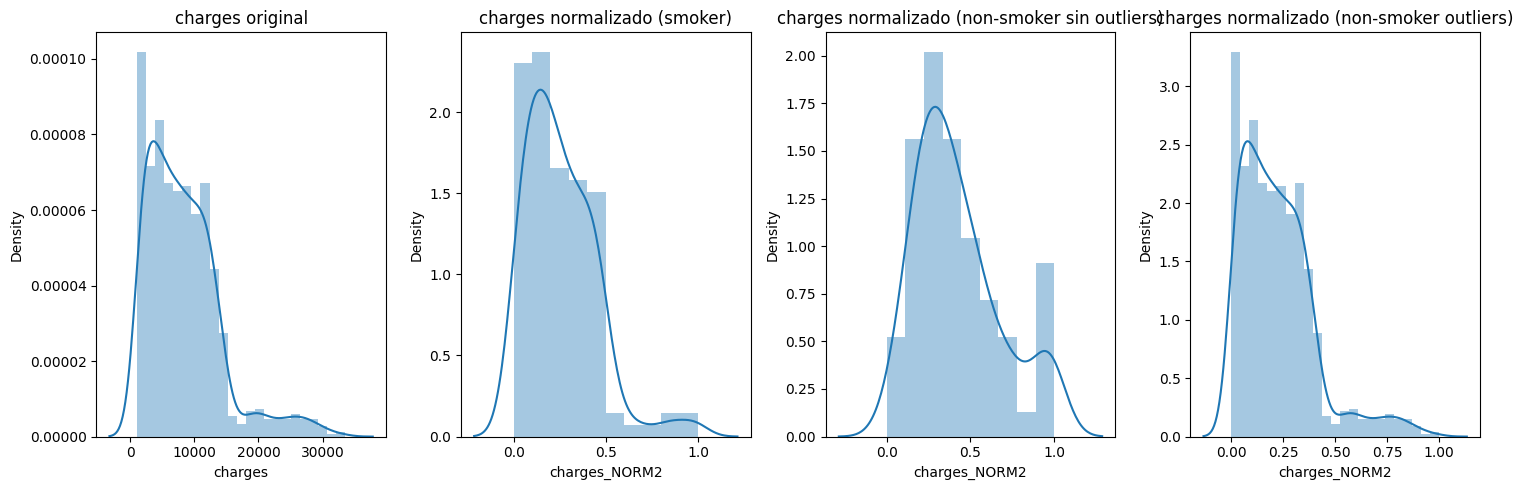

In [92]:
fig, axes = plt.subplots(1, 4, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado (smoker)')
axes[2].set_title('charges normalizado (non-smoker sin outliers)')
axes[3].set_title('charges normalizado (non-smoker outliers)')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(['charges_NORM2'], ax = axes[1])
sns.distplot(df_smoker['charges_NORM2'], ax = axes[2])
sns.distplot(df_non_smoker['charges_NORM2'], ax = axes[3])
fig.tight_layout();

In [93]:
print('original smokers', stats.shapiro(df_mayor_Q3["charges"]), '\n smokers log:', stats.shapiro(df_mayor_Q3["charges_NORM2"]), 
      '\n original non-smokers con charges', stats.shapiro(df_smoker["charges"]), '\n non-smokers con charges log:', stats.shapiro(df_smoker["charges_NORM2"]),
      '\n original non-smokers con charges outliers', stats.shapiro(df_non_smoker["charges"]), '\n non-smokers con charges outliers log:', stats.shapiro(df_non_smoker["charges_NORM2"]),
      )

original smokers ShapiroResult(statistic=0.9084067940711975, pvalue=1.0183718046619106e-07) 
 smokers log: ShapiroResult(statistic=0.9084067940711975, pvalue=1.0183718046619106e-07) 
 original non-smokers con charges ShapiroResult(statistic=0.9242526888847351, pvalue=1.0104752163897501e-06) 
 non-smokers con charges log: ShapiroResult(statistic=0.9242525696754456, pvalue=1.0104537295774207e-06) 
 original non-smokers con charges outliers ShapiroResult(statistic=0.8832111954689026, pvalue=1.644357638366861e-27) 
 non-smokers con charges outliers log: ShapiroResult(statistic=0.8832111954689026, pvalue=1.644357638366861e-27)


# estandarización

In [96]:
df_mayor_Q3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,139.0,41.079137,1.380142e+01,18.000000,30.000000,43.000000,52.500000,64.000000
bmi,139.0,35.564604,4.434917e+00,22.895000,32.667500,35.200000,37.660000,52.580000
children,139.0,1.187050,1.126546e+00,0.000000,0.000000,1.000000,2.000000,4.000000
charges,139.0,42103.947206,5.582168e+03,34617.840650,37786.149950,40974.164900,45786.706425,63770.428010
charges_LOG,139.0,10.639811,1.255061e-01,10.452124,10.539697,10.620697,10.731748,11.063045
charges_SQRT,139.0,204.771179,1.318950e+01,186.058702,194.386567,202.420762,213.978210,252.528074
charges_BC,139.0,0.429897,2.120846e-12,0.429897,0.429897,0.429897,0.429897,0.429897
charges_NORM2,139.0,0.256790,1.914811e-01,0.000000,0.108680,0.218036,0.383117,1.000000


In [97]:
df_smoker.describe().T

,count,mean,std,min,25%,50%,75%,max
age,138.0,36.362319,13.850053,18.000000,24.000000,35.000000,47.000000,64.000000
bmi,138.0,25.837428,3.493473,17.195000,23.655000,26.345000,28.307500,33.110000
children,138.0,1.065217,1.203441,0.000000,0.000000,1.000000,2.000000,5.000000
charges,138.0,22014.245543,5517.072699,12829.455100,17913.921787,20878.860675,24819.232350,34472.841000
charges_LOG,138.0,9.970170,0.239870,9.459499,9.793333,9.946480,10.119368,10.447927
charges_SQRT,138.0,147.277804,18.051458,113.267185,133.842886,144.494734,157.540962,185.668632
charges_BC,138.0,1.483643,0.000288,1.482925,1.483438,1.483637,1.483839,1.484163
charges_NORM2,138.0,0.424369,0.254908,0.000000,0.234920,0.371911,0.553970,1.000000


In [98]:
df_non_smoker.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1060.0,39.350943,14.059279,18.000000,26.750000,40.000000,52.000000,64.000000
bmi,1060.0,30.649047,6.051454,15.960000,26.315000,30.305000,34.430000,53.130000
children,1060.0,1.087736,1.216366,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1060.0,8362.048001,5815.843466,1121.873900,3986.438700,7341.416000,11354.085925,33471.971890
charges_LOG,1060.0,8.784704,0.738843,7.022756,8.290653,8.901287,9.337333,10.418464
charges_SQRT,1060.0,86.263530,30.356561,33.494386,63.138247,85.682061,106.555553,182.953469
charges_BC,1060.0,23.973499,4.145907,15.219510,20.997101,24.340825,26.988076,34.626038
charges_NORM2,1060.0,0.223807,0.179778,0.000000,0.088549,0.192257,0.316296,1.000000


para la estandarización, con hacer solamente el `RobustScaler` para las variables numéricas, sería suficiente -- para minimizar el sesgo que puedan suporner los outliers en las variables predictoras.

In [99]:
num_col = df_numericas.columns.drop("charges")
num_col

Index(['age', 'bmi', 'children'], dtype='object')

In [100]:
# construir el modelo de escalador
robust = RobustScaler()

In [114]:
# ajustamos el modelo utilizando nuestro set de datos
for index, data in enumerate([df_mayor_Q3, df_smoker, df_non_smoker]):
    robust.fit(data[num_col])
    X_robust = robust.transform(data[num_col])
    name = f'df_{index}'
    print(name)
    locals()[name] = data.copy()
    locals()[name][num_col] = X_robust

df_0
df_1
df_2


In [118]:
df_0.head(1)

,age,sex,bmi,children,smoker,region,charges,charges_LOG,charges_SQRT,charges_BC,charges_NORM2
14,-0.711111,male,1.388082,-0.5,yes,southeast,39611.7577,10.586881,199.027028,0.429897,0.171303


In [119]:
df_1.head(1)

,age,sex,bmi,children,smoker,region,charges,charges_LOG,charges_SQRT,charges_BC,charges_NORM2
0,-0.695652,female,0.334229,-0.5,yes,southwest,16884.924,9.734176,129.942002,1.483355,0.187377


In [120]:
df_2.head(1)

,age,sex,bmi,children,smoker,region,charges,charges_LOG,charges_SQRT,charges_BC,charges_NORM2
1,-0.871287,male,0.426987,0.0,no,southeast,1725.5523,7.453302,41.539768,17.021379,0.018661


In [128]:
df_mayor_Q3_en = df_0
df_smoker_en = df_1
df_non_smoker_en = df_1
print(df_mayor_Q3_en.shape, df_smoker_en.shape, df_non_smoker_en.shape)

(139, 11) (138, 11) (138, 11)


# encoding
una vez normalizadas + estandarizadas las variables, procedemos con el encoding.
<br> Según lo que hemos visto antes, existen tres variables categóricas que necesitan encoding:
- `smoker`
- `sex`
- `state`

Por lo que hemos visto en el EDA, `sex` y `state` son varaibles categóricas sin orden. En cambio, la variable `smokers` si que tienen orden.

## variables categóricas ordinales
en este caso, asignaremos el valor de `smokers` con un map, para asignar los valores concretos que queremos.

In [125]:
list_smokers = sorted(df.smoker.unique())
list_smokers

['no', 'yes']

In [126]:
mapa = {list_smokers[0]:0, list_smokers[1]:1}
mapa

{'no': 0, 'yes': 1}

In [131]:
for data in [df_mayor_Q3_en, df_smoker_en, df_non_smoker_en]:
    data["smoker_map"] = data["smoker"].map(mapa)
print(df_mayor_Q3_en.shape, df_smoker_en.shape, df_non_smoker_en.shape)

(139, 13) (138, 13) (138, 13)


In [132]:
df_mayor_Q3_en.head(1)

,age,sex,bmi,children,smoker,region,charges,charges_LOG,charges_SQRT,charges_BC,charges_NORM2,sex_map,smoker_map
14,-0.711111,male,1.388082,-0.5,yes,southeast,39611.7577,10.586881,199.027028,0.429897,0.171303,NaN,1


## variables categóricas sin orden
en este caso asignaremos las variables con el método de sklearn LabelEncoder

In [142]:
# iniciamos el método de OneHot Encoder

le = LabelEncoder()

In [143]:
for data in [df_mayor_Q3_en, df_smoker_en, df_non_smoker_en]:
    for columna in list(df_categoricas.drop('smoker', axis = 1).columns):
        transformada = le.fit_transform(data[columna])
        data[f'{columna}_encoded'] = transformada

In [144]:
df_mayor_Q3_en

,age,sex,bmi,children,smoker,region,charges,charges_LOG,charges_SQRT,charges_BC,charges_NORM2,sex_map,smoker_map,sex_encoded,region_encoded
14,-0.711111,male,1.388082,-0.5,yes,southeast,39611.75770,10.586881,199.027028,0.429897,0.171303,NaN,1,1,2
19,-0.577778,male,0.020030,-0.5,yes,southwest,36837.46700,10.514271,191.930891,0.429897,0.076138,NaN,1,1,3
23,-0.400000,female,-0.656985,0.0,yes,northeast,37701.87680,10.537465,194.169711,0.429897,0.105789,NaN,1,0,0
29,-0.533333,male,0.220330,0.5,yes,southwest,38711.00000,10.563879,196.751112,0.429897,0.140405,NaN,1,1,3
30,-0.933333,male,0.080120,-0.5,yes,southwest,35585.57600,10.479696,188.641395,0.429897,0.033196,NaN,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,0.088889,male,-0.969454,-0.5,yes,southeast,62592.87309,11.044407,250.185677,0.429897,0.959607,NaN,1,1,2
1301,0.844444,male,-0.866299,1.0,yes,northwest,46718.16325,10.751888,216.143849,0.429897,0.415069,NaN,1,1,1
1303,0.000000,male,-1.482223,-0.5,yes,southwest,37829.72420,10.540850,194.498648,0.429897,0.110175,NaN,1,1,3
1313,-1.066667,female,-0.100150,0.5,yes,southwest,36397.57600,10.502257,190.781488,0.429897,0.061049,NaN,1,0,3
